In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.stats.distributions as dist
from matplotlib.colors import LogNorm
from illustris_python import illustris_python as il
import sys
sys.path.append('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/')
from CNN_execute_script_v2 import *
from tensorflow import keras
from sklearn.metrics import auc
import os
sys.path.append('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/')
from cnn_tools import *

2022-12-28 12:55:38.550193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 12:55:38.961086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/ansys_inc/v181/Framework/bin/Linux64/Mesa:
2022-12-28 12:55:38.961171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-28 12:55:39.015639: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been

In [2]:
CNN_csv = 'CNN_info_V4.parquet'
CNN_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/'
real_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/IMG_dir/REAL_FITS_11_04v2_dir/'
df_dir = '/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/DF_dir/'
objects_df = pd.read_parquet(df_dir + 'objects_master_neighbours_morph_22_12_13_v2.parquet')
cnn_run_table = pd.read_parquet(CNN_dir + CNN_csv)
scale_factor = pd.read_parquet('/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/scale_factor.parquet')

# View run table
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(cnn_run_table[-50:])
#cnn_run_table.sort_values('accuracy', ascending=False)[:50]

     RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
370     441       100         93  0.398398   0.281281  0.712558  0.781469   
371     442       100         45  0.446446   0.296296  0.789976  0.778084   
372     443       100         50  0.450450   0.381381  0.710663  0.695440   
373     446       100         50  0.539540   0.433433  0.677304  0.682816   
374     444       100         45  0.472472   0.245245  0.793603  0.774089   
375     448       100         50  0.429429   0.274274  0.723384  0.708330   
376     449       100         50  0.351351   0.233233  0.733266  0.722642   
377     447       100         45  0.546547   0.485485  0.823124  0.818606   
378     451       100         50  0.412412   0.278278  0.731819  0.716775   
379     450       100         45  0.539540   0.416416  0.807202  0.797203   
380     452       100         50  0.303303   0.162162  0.723329  0.702462   
381     453       100         45  0.463463   0.358358  0.780938  0.776467   

In [4]:
scale_factor.to_parquet(df_dir + 'scale_factor.parquet')

In [5]:
save_avg_results(372, 0.75)
#load_avg_results(229)
results_list = load_avg_results([372])

Valid cnn runs:  [474 477 478 479 480 481 486 489 490 491 492]
Loading test images...


2022-12-28 12:55:44.281298: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-12-28 12:55:44.281398: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (py-noether): /proc/driver/nvidia/version does not exist
2022-12-28 12:55:44.282938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading models...
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00474/CNN_model.h5']
123/123 [==============================] - 1s 8ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00477/CNN_model.h5']
123/123 [==============================] - 1s 8ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00478/CNN_model.h5']
123/123 [==============================] - 1s 8ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00479/CNN_model.h5']
123/123 [==============================] - 1s 9ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00480/CNN_model.h5']
123/123 [==============================] - 1s 7ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00481/CNN_model.h5']
123/123 [==============================] - 1s 8ms/step
['/home/AstroPhysics-Shared/PROJECTS/MPhys_Villforth/DATA/CNN_dir/CNN_run_00486/CN

/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/cnn_tools.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['PRED_LABEL_' + str(run_id)][i] = p_tst[run_id][i]


Individual run accuracies: 
{474: 0.7845134997452878, 477: 0.7840040753948039, 478: 0.7908813041263373, 479: 0.8051451859398879, 480: 0.8005603667855323, 481: 0.7679572083545594, 486: 0.7847682119205298, 489: 0.7967396841569027, 490: 0.7947019867549668, 491: 0.7850229240957718, 492: 0.7766174223127865}


/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/cnn_tools.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['PRED_MED'][i] = med
/mnt/jb2854-XDrive/Physics/StudentProjects/MPhys/2022-23/IllustrisTNG-Mergers/cnn_tools.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['STD_DEV'][i] = np.std(preds)


Optimal threshold:  0.4624624624624625
AUC score 0.8898187566843532
Accuracy:  0.8110035659704534


In [4]:
# Filter and view run table by a specific grab list
grab_list_id = [229, 176, 224]

#filtered = cnn_run_table.loc[(cnn_run_table.boost_massive_gals == 'True') & (cnn_run_table.ratio_merger == 0.1) & 
#                 (cnn_run_table.dt_merger == 0.2) & (cnn_run_table.ratio_nonmerger == 0.1) & (cnn_run_table.dt_nonmerger == 1)
#                             & (cnn_run_table.grab_list_name == 'grablist_run_%05d.parquet' %(grab_list_id))& (cnn_run_table.PIX_SCALE == 50)]

filtered = cnn_run_table.loc[(cnn_run_table.boost_massive_gals == 'True') & (cnn_run_table.ratio_merger == 0.1) & 
                 (cnn_run_table.dt_merger == 0.2)  & (cnn_run_table.dt_nonmerger == 1)
                            & (cnn_run_table.PIX_SCALE == 50) & (cnn_run_table.N_EPOCHS == 100)]


In [4]:
filtered.sort_values('accuracy', ascending=False)

RUN_ID  N_EPOCHS  PIX_SCALE    TH_OPT  TH_OPT_F1   TRA_ACC   VAL_ACC  \
262     329       100         50  0.586587   0.511512  0.834710  0.857512   
259     326       100         50  0.455455   0.344344  0.842019  0.854281   
273     339       100         50  0.562563   0.427427  0.817086  0.842003   
178     238       100         50  0.555556   0.466466  0.793180  0.827948   
241     305       100         50  0.404404   0.336336  0.793205  0.826333   
266     332       100         50  0.653654   0.515516  0.819604  0.836187   
270     336       100         50  0.443443   0.212212  0.816011  0.836187   
256     321       100         50  0.203203   0.074074  0.863065  0.874475   
182     245       100         50  0.534535   0.436436  0.800880  0.829079   
251     317       100         50  0.311311   0.211211  0.828453  0.790307   
214     277       100         50  0.531532   0.389389  0.789269  0.828271   
226     293       100         50  0.448448   0.401401  0.775263  0.812278   
396     469       100         50  0.554555   0.459459  0.770479  0.776693   
394     467       100         50  0.373373   0.206206  0.770943  0.777303   
218     284       100         50  0.646647   0.489489  0.800318  0.828595   
277     343       100         50  0.515516   0.484484  0.759912  0.810985   
204     266       100         50  0.560561   0.480480  0.792496  0.818740   
397     470       100         50  0.504505   0.410410  0.772488  0.787065   
179     237       100         50  0.580581   0.459459  0.817095  0.840696   
185     247       100         50  0.401401   0.228228  0.824846  0.833066   
393     466       100         50  0.486486   0.364364  0.793045  0.820012   
211     271       100         50  0.187187   0.110110  0.822295  0.823159   
207     273       100         50  0.533534   0.438438  0.765412  0.807754   
395     468       100         50  0.392392   0.237237  0.766924  0.777913   
234     298       100         50  0.222222   0.089089  0.828709  0.853949   
249     313       100         50  0.523524   0.338338  0.796832  0.801071   
245     311       100         50  0.499499   0.386386  0.771841  0.794669   
235     297       100         50  0.163163   0.062062  0.821168  0.847658   
243     304       100         50  0.468468   0.315315  0.797512  0.776439   
280     347       100         50  0.659660   0.505506  0.732315  0.791438   
248     316       100         50  0.508509   0.444444  0.731557  0.787561   
255     322       100         50  0.603604   0.360360  0.794232  0.791834   
390     463       100         50  0.465465   0.363363  0.728316  0.783935   
387     460       100         50  0.477477   0.332332  0.726117  0.788873   
389     462       100         50  0.518519   0.432432  0.730290  0.791177   
388     461       100         50  0.474474   0.333333  0.730121  0.778119   
392     465       100         50  0.505506   0.439439  0.698483  0.778778   
382     454       100         50  0.350350   0.241241  0.739790  0.713041   
391     464       100         50  0.508509   0.438438  0.697214  0.778339   
376     449       100         50  0.351351   0.233233  0.733266  0.722642   
223     288       100         50  0.494494   0.392392  0.710951  0.788853   
227     291       100         50  0.557558   0.401401  0.779508  0.764391   
252     319       100         50  0.572573   0.424424  0.766825  0.745917   
375     448       100         50  0.429429   0.274274  0.723384  0.708330   
201     267       100         50  0.427427   0.249249  0.759536  0.741098   
378     451       100         50  0.412412   0.278278  0.731819  0.716775   
372     443       100         50  0.450450   0.381381  0.710663  0.695440   
385     458       100         50  0.300300   0.174174  0.725677  0.697129   
380     452       100         50  0.303303   0.162162  0.723329  0.702462   
384     457       100         50  0.433433   0.314314  0.723466  0.716064   
383     456       100         50  0.561562   0.441441  0.712410  0.688328   
3

In [6]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

In [7]:
scale = {'Mstellar': 1e10, 'MDM': 1e10, 'Mgas': 1e10, 'HMRad': 1/0.7, 'MBH': 1e10, 'BHacc' : 1e10, 'SFR' : 1, 'edd_ratio' : 1, 'Edd_ratio' : 1, 'Mass/radius**2' : 1e10/((1/0.7)**2), 'SFR/Mass' :1e-10, 'r_sep':1, 'S/T' : 1, 'B/T':1, 'HMRad_prop':1}
xlabels = {'Mstellar' : 'log_10(Mstellar)', 'Redshift' : 'Redshift', 'HMRad' : 'log_10(Half Mass Radius [kpc])', 'edd_ratio':'log10(Eddington Ratio)', 'Edd_ratio':'log10(Eddington Ratio)', 'Mass/radius**2' : 'log10(Mass/radius**2)', 'SFR/Mass':'SFR/Mass', 'r_sep':'log10(r_sep)', 'S/T':'S/T','B/T':'B/T', 'HMRad_prop':'log10(HMRad)'}
title_labels = {0: '(No boosting or HMrad matching)', 1: '(No boosting or HMrad matching)' , 2: '(Boosting and HMrad matching)', 3: '(Boosting and HMrad matching)', 4: '(Boosting + HMrad matching + Higher M cutoff)', 5: '(Boosting + HMrad matching + Higher M cutoff)', 6: '(Boosting + HMrad matching + Higher M cutoff)'}


def plot_multi_results(results_list, params, no_log):
    
    for param in params:
        
        fig = plt.figure(figsize = (15,6 * len(results_list)))
        ax = fig.subplots(len(results_list),2)
        
        probs = []
        
        for i, results in enumerate(results_list):
            
            if param == 'Edd_ratio':
                results = results.loc[results['Edd_ratio'] > 1e-6]
            
            error_bars = []

            if param in no_log:
                counts_M_total, edges_M, bars = ax[i,0].hist(results.loc[results['LABEL'] == 1][param].values, histedges_equalN(results.loc[results['LABEL'] == 1][param].values, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results.loc[results['LABEL'] == 0][param].values, bins =histedges_equalN(results.loc[results['LABEL'] == 0][param].values, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges, bars = ax[i,0].hist(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values, bins = edges_NM, histtype = 'step', label = 'TN')

            else:

                results_M_total = np.log10(results.loc[results['LABEL'] == 1][param].values * scale[param])
                results_M = np.log10(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)][param].values * scale[param])
                results_NM_total = np.log10(results.loc[results['LABEL'] == 0][param].values * scale[param])
                results_NM = np.log10(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)][param].values * scale[param])

                results_M_total[results_M_total == -np.inf] = 0
                results_M[results_M == -np.inf] = 0
                results_NM_total[results_NM_total == -np.inf] = 0
                results_NM[results_NM == -np.inf] = 0
                
                counts_M_total, edges_M, bars = ax[i,0].hist(results_M_total, histedges_equalN(results_M_total, 10), histtype = 'step', label = 'Post Mergers')
                counts_M, edges, bars = ax[i,0].hist(results_M, bins = edges_M, histtype = 'step', label = 'TP')
                counts_NM_total, edges_NM, bars = ax[i,0].hist(results_NM_total, histedges_equalN(results_NM_total, 10), histtype = 'step', label = 'Controls')
                counts_NM, edges_, bars = ax[i,0].hist(results_NM, bins = edges_NM, histtype = 'step', label = 'TN')

            if param not in no_log:
                edges_M = 10**(edges_M-10)

            c = 0.683
            k_M, k_NM = counts_M, counts_NM
            n_M, n_NM = counts_M_total, counts_NM_total
            p_M_lower, p_NM_lower = dist.beta.ppf((1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf((1-c)/2.,k_NM+1,n_NM-k_NM+1)
            p_M_upper, p_NM_upper = dist.beta.ppf(1-(1-c)/2.,k_M+1,n_M-k_M+1), dist.beta.ppf(1-(1-c)/2.,k_NM+1,n_NM-k_NM+1)



            probs_M_total = []
            probs_M = []
            probs_NM_total = []
            probs_NM = []
            bin_edges = []

            for j in range(len(edges_M) - 1):
                probs_M_total.append(results.loc[(results['LABEL'] == 1) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_M.append(results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] > 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM_total.append(results.loc[(results['LABEL'] == 0) & (results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                probs_NM.append(results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] < 0.5)].loc[(results[param] > edges_M[j]) & (results[param] < edges_M[j + 1])]['PRED_MED'].values)
                bin_edges.append(np.array([edges_M[j], edges_M[j + 1]]))

            
            
            ax[i,0].set_title(param + ' distribution')
            ax[i,0].set_ylabel('# counts')
            ax[i,0].set_xlabel(xlabels[param])
            ax[i,0].legend()


            centers = 0.5*(edges[1:]+ edges[:-1])
            centers_NM = 0.5*(edges_NM[1:]+ edges_NM[:-1])
            
            yerr_low = p_M_lower - counts_M/counts_M_total
            yerr_up = p_M_upper - counts_M/counts_M_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            
            yerr = np.absolute(np.array([yerr_low, yerr_up]))
            ax[i,1].errorbar(centers, counts_M/counts_M_total, yerr = yerr, fmt = '.-', label = 'PM')

            yerr_low = p_NM_lower - counts_NM/counts_NM_total
            yerr_up = p_NM_upper - counts_NM/counts_NM_total 
            yerr_low[yerr_low > 0] = 0
            yerr_up[yerr_up < 0] = 0
            yerr = np.absolute(np.array([yerr_low, yerr_up]))

            ax[i,1].errorbar(centers_NM, counts_NM/counts_NM_total, yerr = yerr , fmt = '.-', label = 'Controls')
            
            
            ax[i,1].set_ylabel('Fraction correctly identified')
            ax[i,1].set_title('Correct fraction binned by ' + param)
            ax[i,1].set_ylim(0, 1.05)
            ax[i,1].set_xlabel(xlabels[param])
            ax[i,1].legend()

        plt.tight_layout()

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10


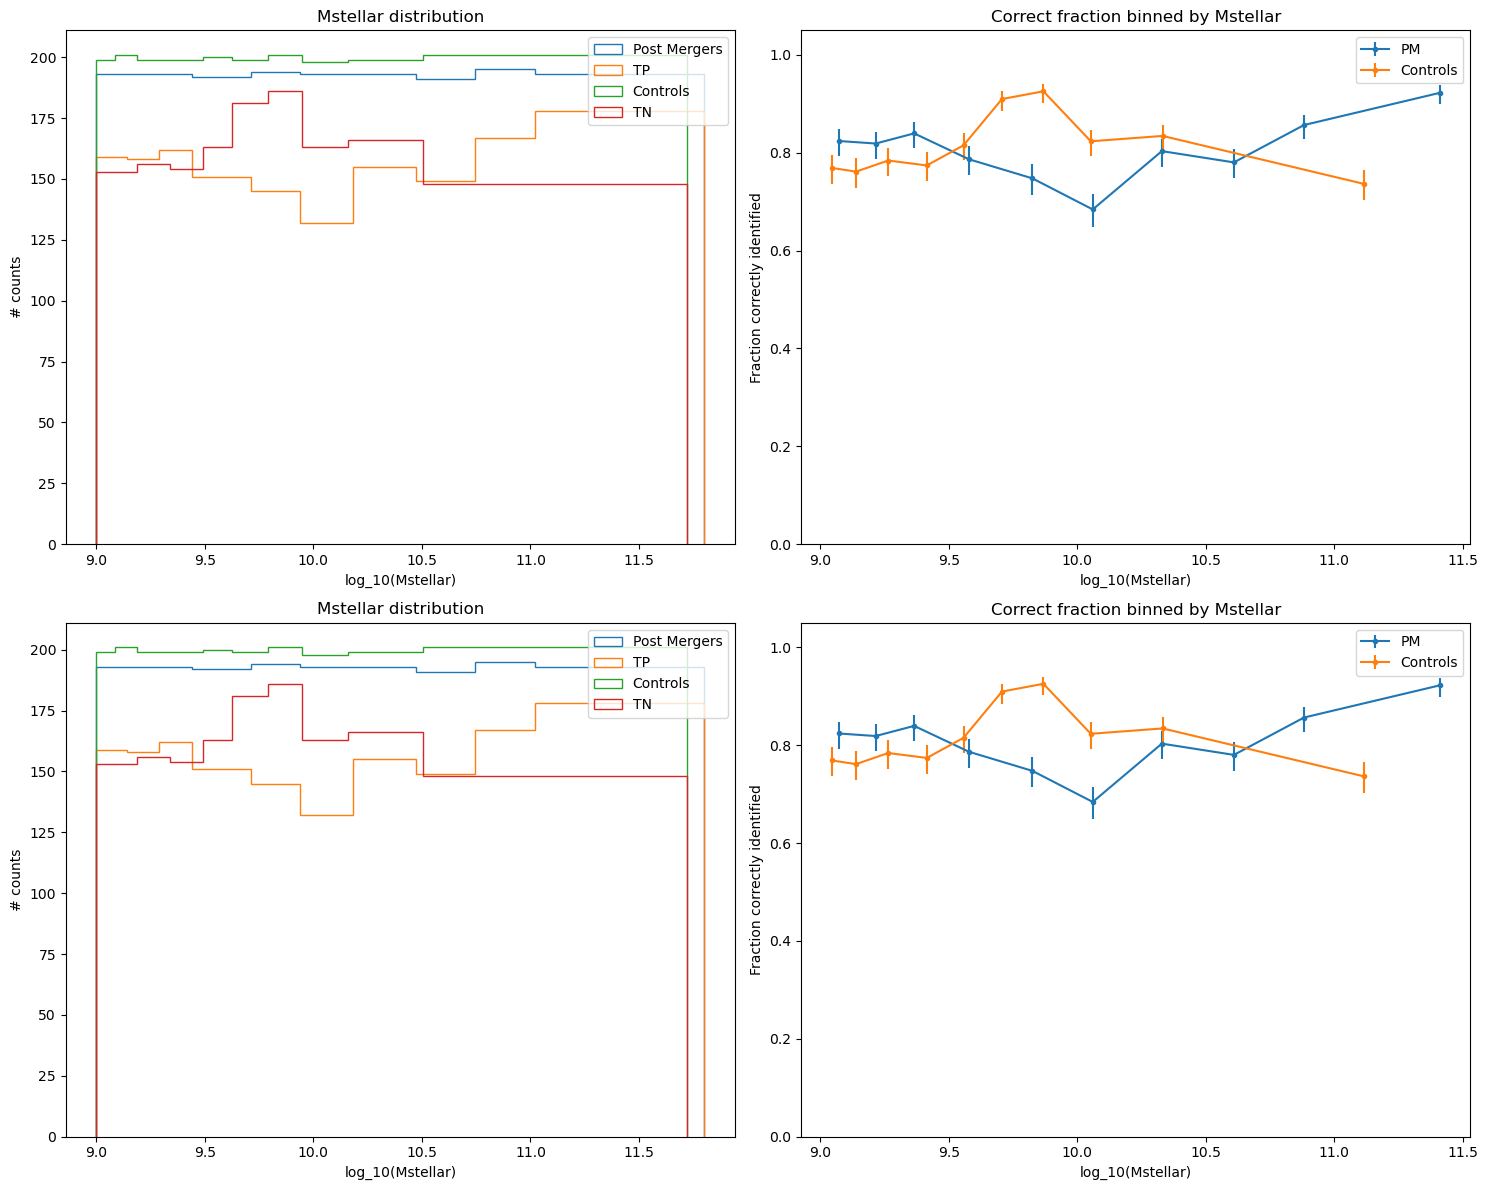

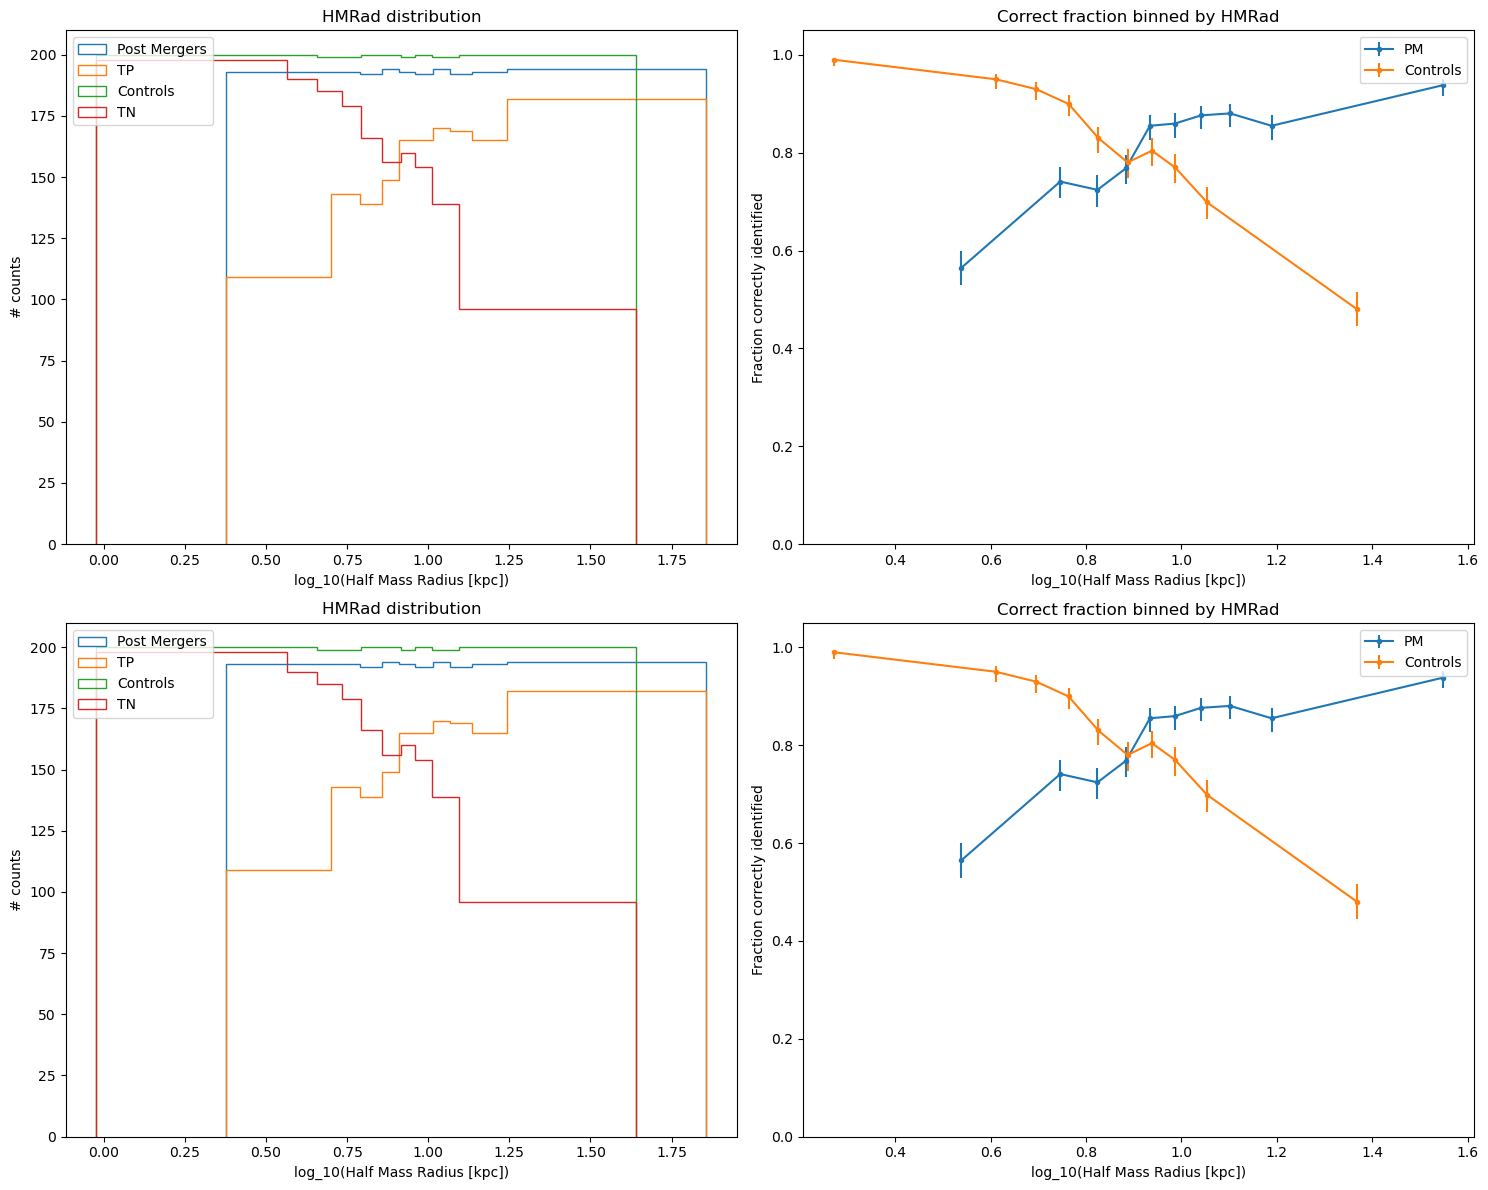

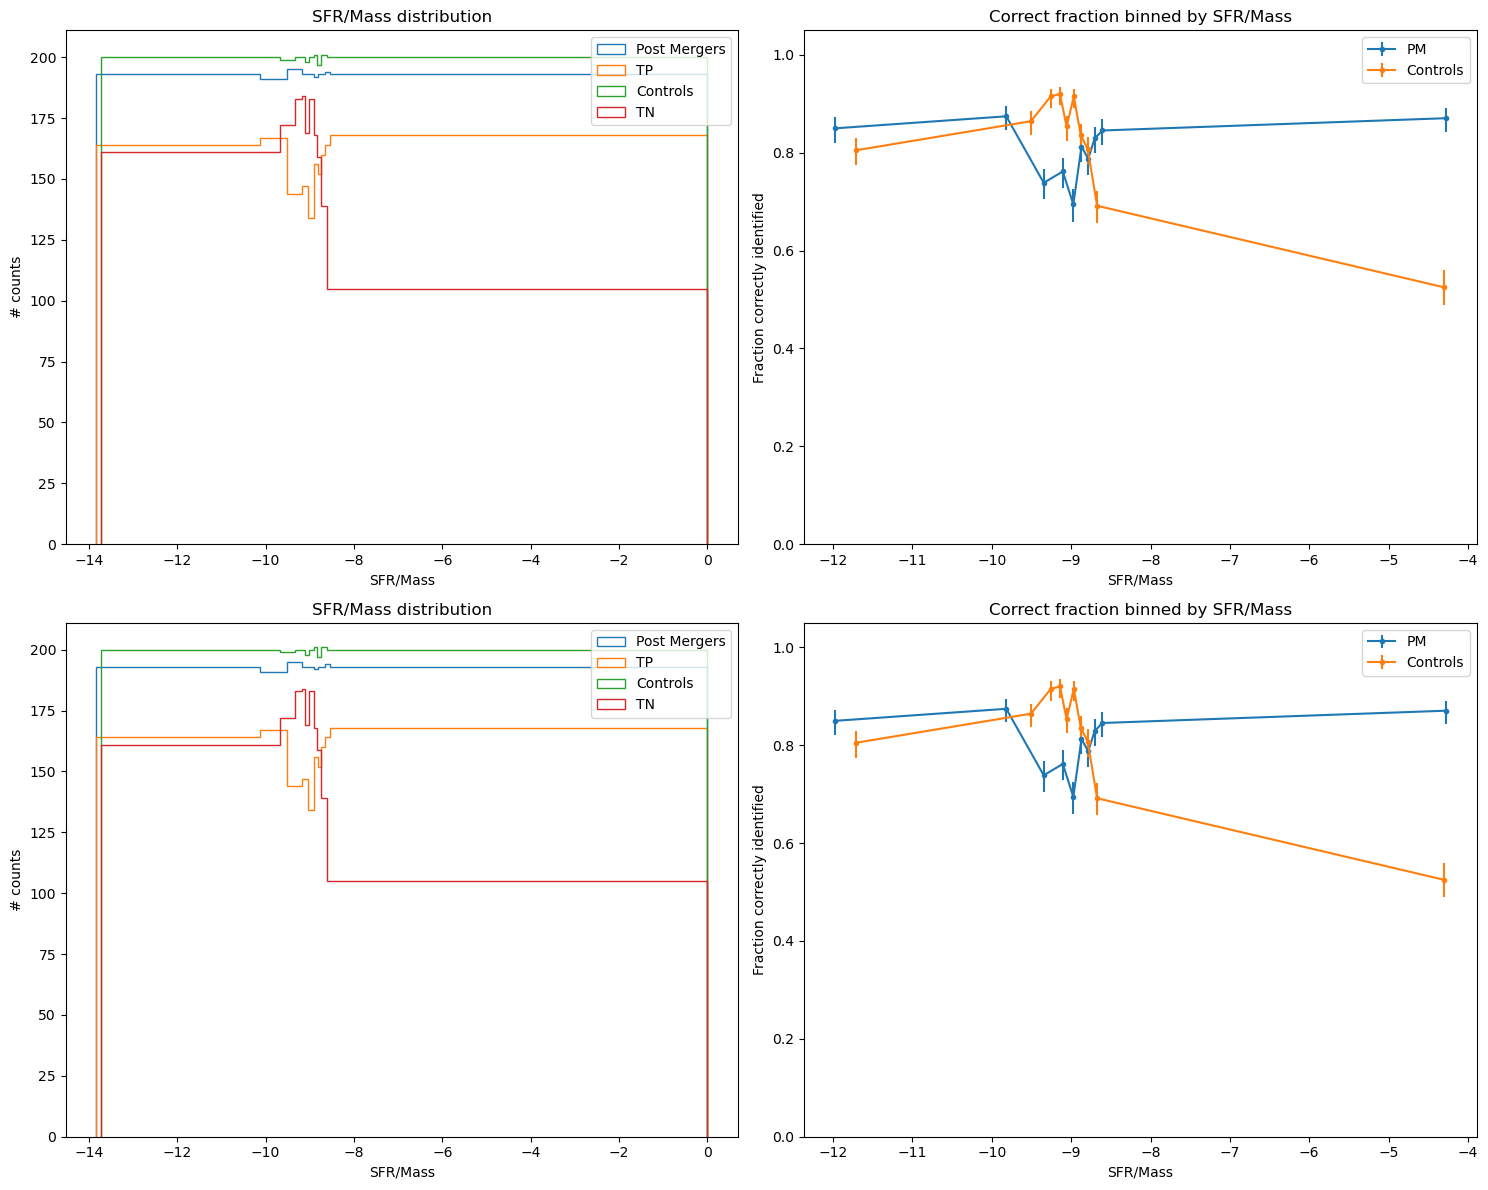

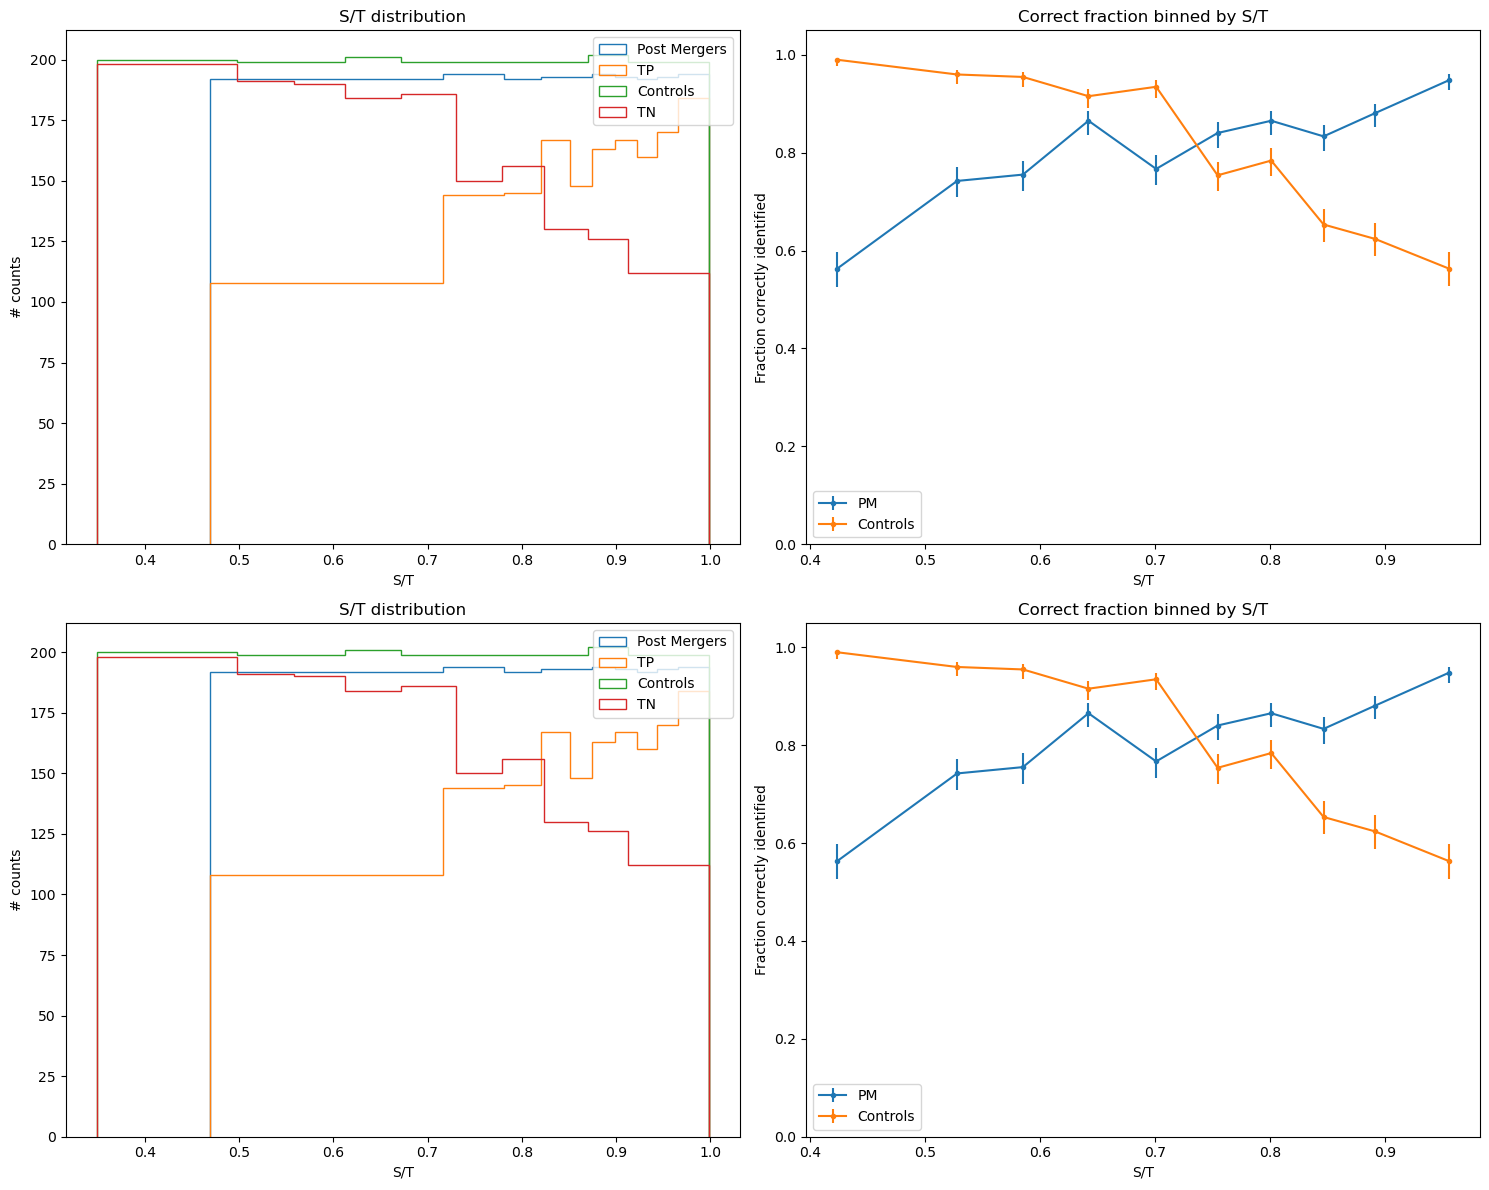

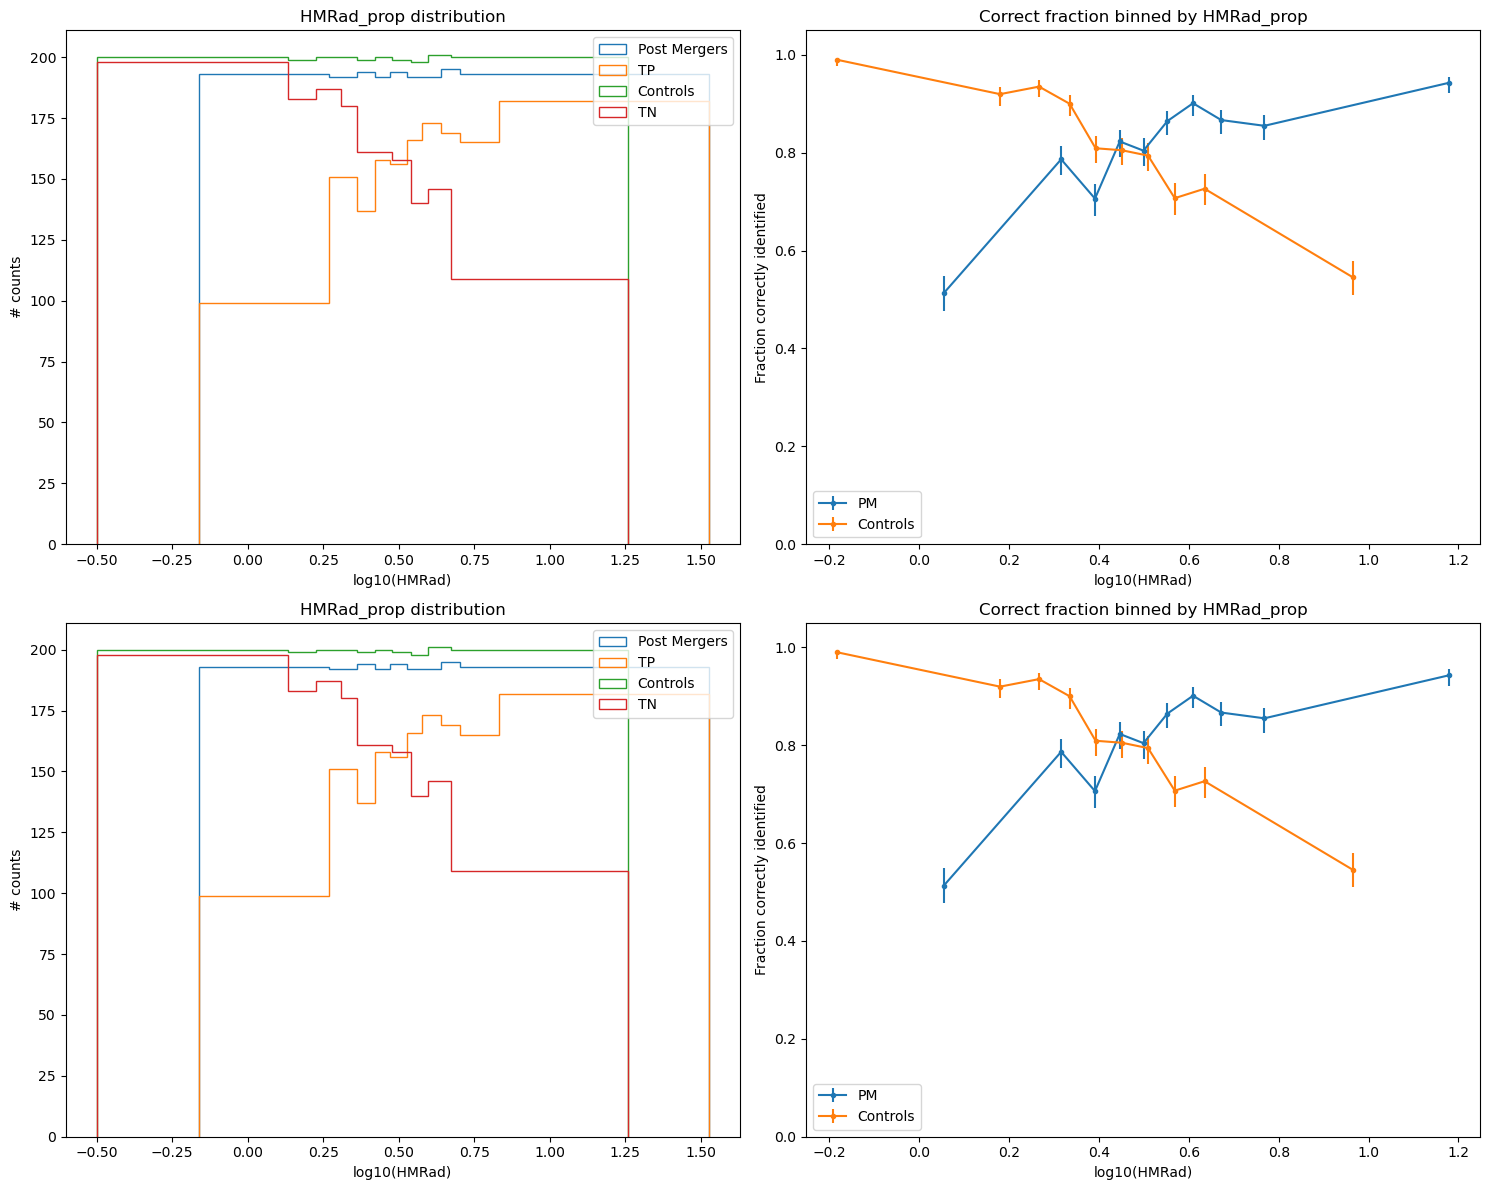

In [8]:
import scipy.stats.distributions as dist

# params = ['Mstellar', 'HMRad', 'SFR/Mass', 'Mass/radius**2', 'r_sep','S/T','B/T', 'HMRad_prop']
params = ['Mstellar', 'HMRad', 'SFR/Mass', 'S/T', 'HMRad_prop']
no_log = ['Redshift', 'ratio_recent', 'Z', 'ratio_recent', 'dt_recent', 'ratio_biggest', 'dt_biggest','GAS_FRAC','S/T','B/T']

plot_multi_results([results_list[0], results_list[0]], params, no_log)

In [9]:
results_list

[          SFID  SnapNum  Mstellar       MBH         MDM       Mgas        SFR  \
 0     249814.0     32.0  0.186945  0.000246   17.362432   2.477809   5.568468   
 1     174924.0     49.0  0.194262  0.000199    6.368720   0.991994   2.379050   
 2     110454.0     49.0  0.130248  0.000000    0.264921   0.069107   0.445205   
 3      59211.0     31.0  4.879585  0.031219  161.113388  23.070415   9.887483   
 4     267662.0     43.0  0.213593  0.000183   31.130737   6.045436   3.321641   
 ...        ...      ...       ...       ...         ...        ...        ...   
 3921  337507.0     39.0  0.332990  0.000499   17.198120   2.456110   2.590434   
 3922  272561.0     42.0  0.834856  0.001375   48.650402   6.301243  20.339876   
 3923  128015.0     37.0  0.166046  0.000190    9.073036   1.627934   2.730540   
 3924  300089.0     37.0  0.311259  0.000541   14.044349   2.100394   2.908172   
 3925  257793.0     37.0  0.106856  0.000136   25.468811   3.558491   1.623684   
 
              

In [7]:
results_list

[          SFID  SnapNum   Mstellar       MBH          MDM        Mgas  \
 0      60509.0     48.0  15.777649  0.073770  1181.365845  151.924438   
 1     171752.0     33.0   0.903566  0.002203    33.873985    4.499676   
 2      56994.0     30.0   0.165674  0.000220     1.205289    0.174738   
 3     409132.0     46.0   0.359539  0.000186    14.328987    2.137404   
 4     401922.0     47.0   0.195052  0.000120    14.615647    2.123135   
 ...        ...      ...        ...       ...          ...         ...   
 5884    9975.0     37.0   0.626156  0.001679     9.834937    1.238402   
 5885   10497.0     43.0   1.859547  0.004191    12.450778    4.147566   
 5886  168501.0     36.0   0.265239  0.000298    11.722245    1.303799   
 5887   49758.0     31.0   1.747522  0.004758   113.752701   17.675135   
 5888  411432.0     42.0   0.150038  0.000130     9.276278    1.597670   
 
             SFR         Z      HMRad     BHacc  ...      r_sep   GAS_FRAC  \
 0     15.285128  0.013197  11.5

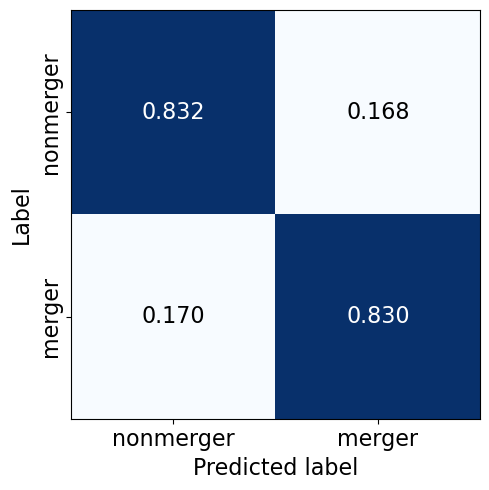

In [28]:
# GENERATE CONFUSION MATRIX
conf_matrix = confusion_matrix(lab, (pred > th_opt).astype(int), normalize='true')

fig = plt.figure(figsize=(5,5))
ax = fig.subplots(nrows=1, ncols=1)
ax.imshow(conf_matrix, cmap='Blues')
for x,y in np.ndindex((2,2)):
    ax.text(x, y, '%.3f' %conf_matrix[y,x], 
            c=np.ones(3)*int(conf_matrix[y,x] > 0.5), ha='center', va='center', size=16)

ax.set_xlabel('Predicted label', size=16)
ax.set_xticks(ticks=range(2),
              labels=['nonmerger', 'merger'])
ax.set_ylabel('Label', size=16)
ax.set_yticks(ticks=range(2),
              labels=['nonmerger', 'merger'],
              rotation=90, va='center')
ax.tick_params(labelsize=16)

fig.tight_layout()

(array([139., 115., 103.,  78.,  83.,  74.,  56.,  52.,  43.,  47.,  47.,
         37.,  33.,  29.,  44.,  23.,  24.,  29.,  33.,  32.,  20.,  18.,
         16.,  18.,  11.,  18.,  17.,  17.,  19.,  15.,  21.,  24.,  18.,
         14.,  16.,  22.,  15.,  13.,  26.,  17.,  14.,  19.,  18.,  13.,
         15.,  11.,  11.,  16.,  10.,   8.,  19.,  20.,  17.,  18.,  10.,
         14.,  17.,  12.,  15.,  16.,  21.,  12.,   9.,  10.,  14.,  13.,
         14.,  17.,  18.,   7.,  11.,  14.,  19.,  19.,  14.,  19.,  12.,
         12.,  15.,  12.,  18.,  12.,  12.,   8.,  13.,   8.,  13.,  11.,
         11.,  11.,  11.,   4.,   9.,   2.,   9.,   3.,   3.,   4.,   0.,
          0.]),
 array([0.02434618, 0.03410271, 0.04385925, 0.05361579, 0.06337233,
        0.07312886, 0.0828854 , 0.09264194, 0.10239848, 0.11215502,
        0.12191155, 0.13166809, 0.14142463, 0.15118117, 0.1609377 ,
        0.17069424, 0.18045078, 0.19020732, 0.19996385, 0.20972039,
        0.21947693, 0.22923347, 0.23899   , 0.

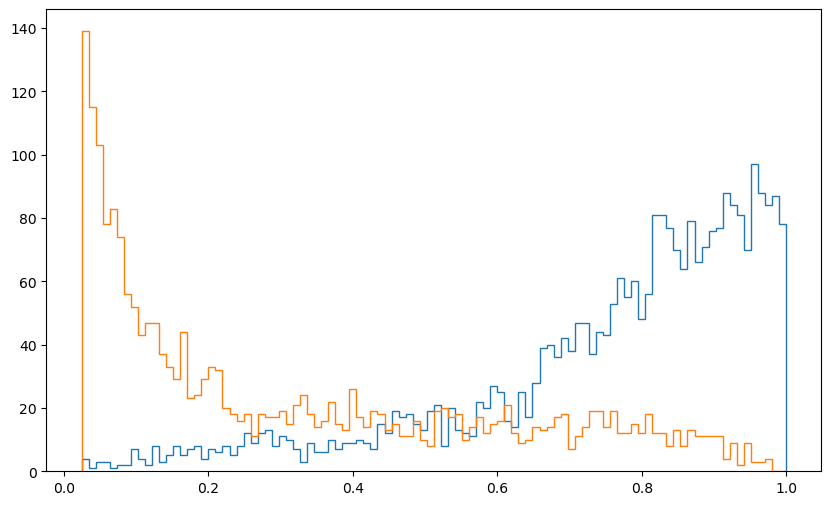

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,6 ))
ax = fig.subplots(1, 1)


counts, edges, bins = ax.hist(results.loc[results['LABEL'] == 1]['PRED_MED'], bins = 100,histtype = 'step')
ax.hist(results.loc[results['LABEL'] == 0]['PRED_MED'], bins = edges,histtype = 'step')

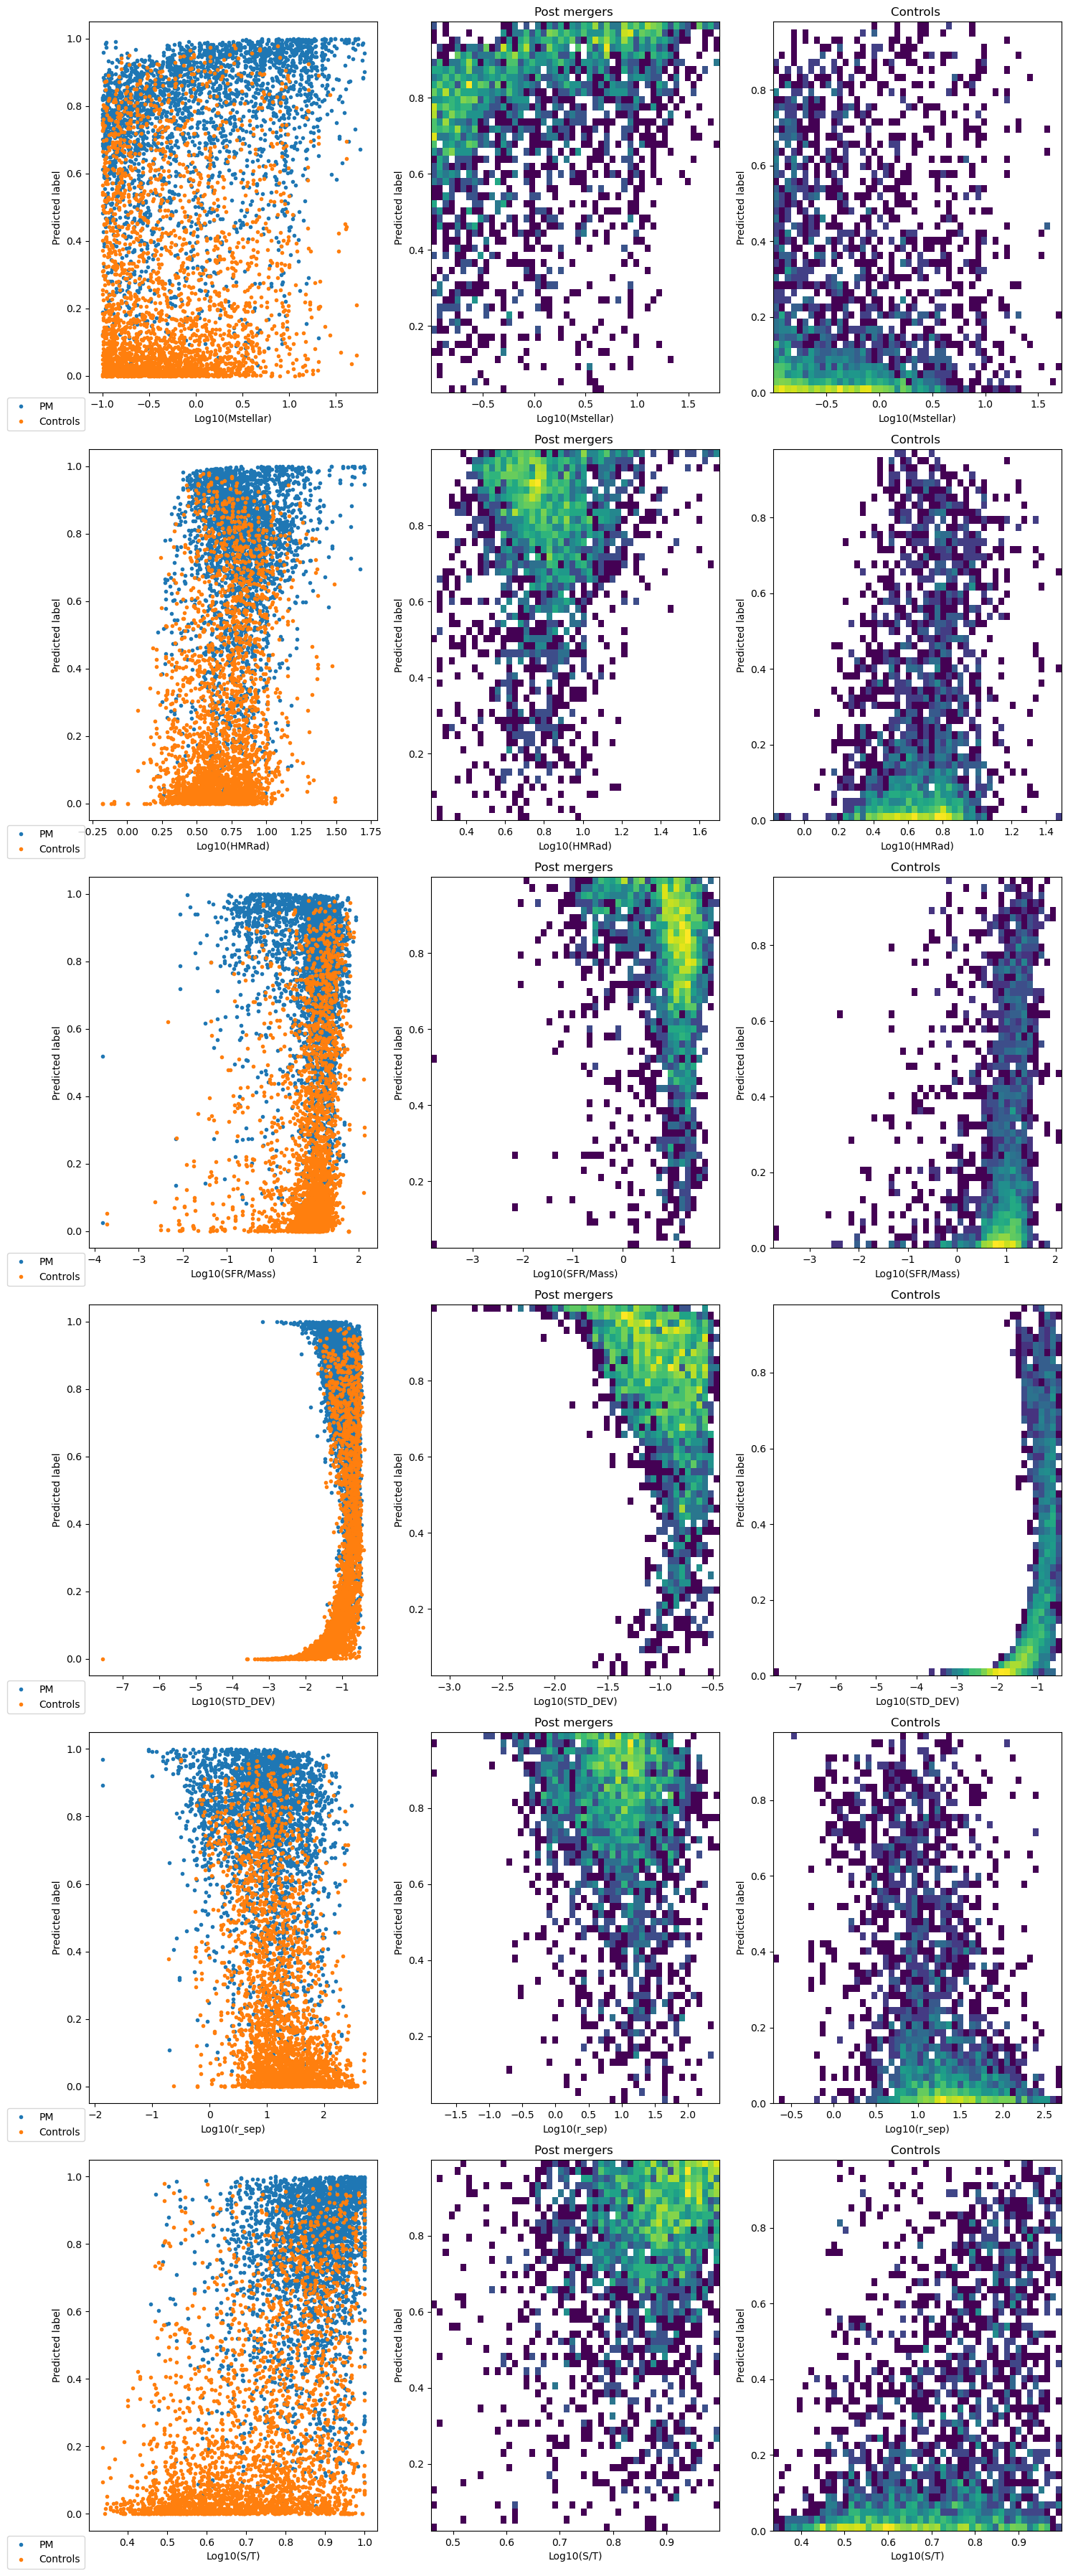

In [11]:
from matplotlib.colors import LogNorm

#results_list = [results_31, results_35, results_42]

params = ['Mstellar', 'HMRad', 'SFR/Mass', 'STD_DEV', 'r_sep', 'S/T']
results = results_out[0]
fig = plt.figure(figsize = (15, 6 * len(params)))
ax = fig.subplots(len(params), 3)
for i, param in enumerate(params):


    mergers = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)

    merger_labels = mergers.loc[mergers[param] > 0]['PRED_MED']
    control_labels = controls.loc[controls[param] > 0]['PRED_MED']
    merger_masses = np.log10(mergers.loc[mergers[param] > 0][param])
    control_masses = np.log10(controls.loc[controls[param] > 0][param])
    
    if param in no_log:
        merger_masses = mergers.loc[mergers[param] > 0][param]
        control_masses = controls.loc[controls[param] > 0][param]
        

   # merger_labels = mergers.loc[mergers[param] > 0]['STD_DEV']
    #control_labels = controls.loc[controls[param] > 0]['STD_DEV']
    #merger_masses = (mergers.loc[mergers[param] > 0][param])
    #control_masses = (controls.loc[controls[param] > 0][param])

    #fig = plt.figure(figsize = (15,5))
    #ax = fig.subplots(1,3)

    ax[i,0].plot(merger_masses, merger_labels, '.', label = 'PM')
    ax[i,0].plot(control_masses, control_labels, '.', label = 'Controls')
    ax[i,0].legend(bbox_to_anchor=(0, 0))
    #ax[0].set_xscale('log')

    ax[i,1].hist2d(merger_masses,merger_labels,bins=50,norm = LogNorm())
    ax[i,2].hist2d(control_masses,control_labels,bins=50,norm = LogNorm())

    ax[i,1].set_title('Post mergers ')
    ax[i,2].set_title('Controls ')

    for axs in ax[i,:]:
        axs.set_xlabel('Log10(%s)'%(param))
        axs.set_ylabel('Predicted label')
fig.tight_layout()

In [27]:
results_list

[        SFID  SNAP  AXES  LABEL  PRED_LABEL PRED_LABEL_238 PRED_LABEL_245  \
 0      60509    48     1    0.0    0.739847       0.820604       0.590622   
 1     171752    33     0    1.0    0.559892       0.474293       0.383617   
 2      56994    30     2    0.0    0.040796      0.0399426      0.0134393   
 3     409132    46     0    1.0    0.141198       0.115713       0.217945   
 4     401922    47     1    1.0    0.666402       0.779956       0.732815   
 ...      ...   ...   ...    ...         ...            ...            ...   
 5884    9975    37     2    1.0    0.590193        0.62355       0.657305   
 5885   10497    43     2    1.0    0.896031         0.9103       0.934385   
 5886  168501    36     1    0.0    0.586623       0.491355       0.620248   
 5887   49758    31     1    1.0    0.858116       0.944943        0.96446   
 5888  411432    42     1    1.0    0.498682       0.777086        0.53442   
 
      PRED_LABEL_305 PRED_LABEL_321 PRED_LABEL_326 PRED_LABEL_

34
34
34
34
248
248
248
248
486
486
486
486
556
556
556
556
610
610
610
610
611
611
611
611
414
414
414
414


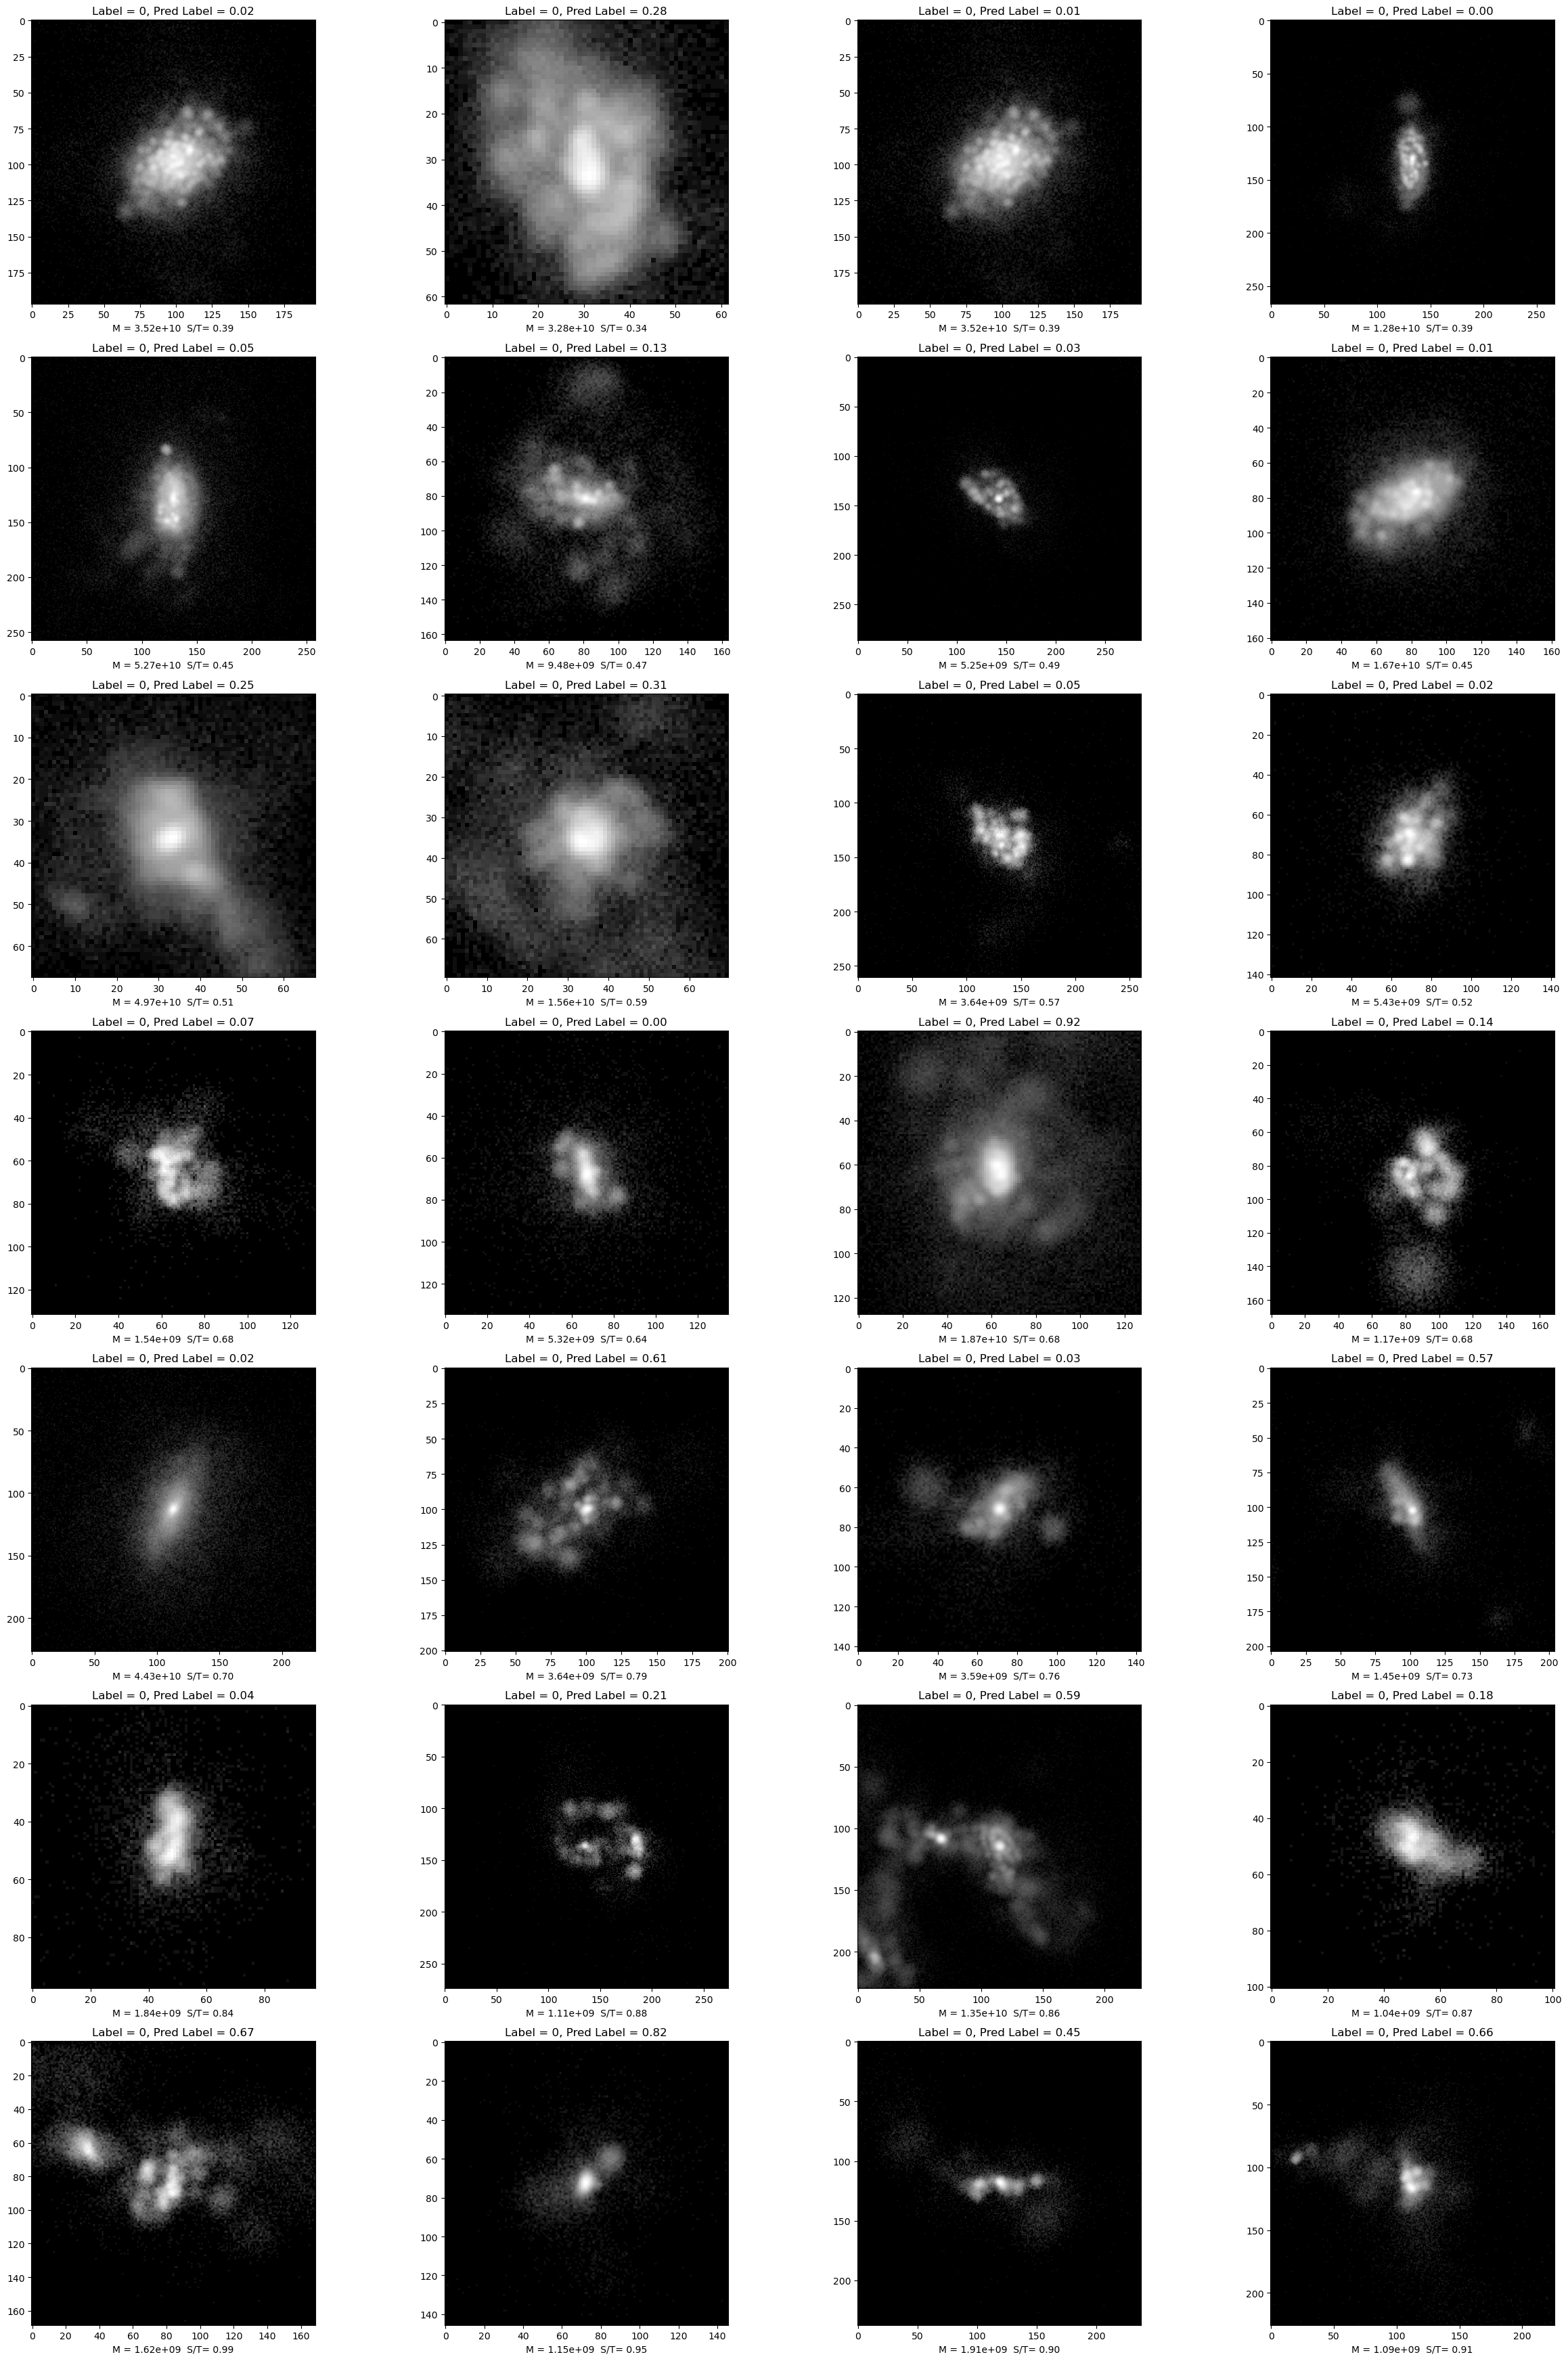

In [50]:
# Plot a few example galaxies from each population

#dfs = [TP, FP, TN, FN]
df = results_list[0]

param = 'S/T'
param_lims = [[0.3, 0.4], [0.4, 0.5], [0.5, 0.6], [0.6,0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1]]



fig = plt.figure(figsize = (25,5 * len(mass_rad_lims)))
ax = fig.subplots(len(mass_rad_lims),4)

for j, mass_rad_lim in enumerate(mass_rad_lims):

    #for i, df in enumerate(dfs):
    for i in range(4):
        #df_filt = df.loc[(df['r_sep'] > mass_rad_lim[0]) & (df['r_sep'] < mass_rad_lim[1])].reset_index(drop = True)
        df_filt = df.loc[(df[param] > mass_rad_lim[0]) & (df[param] < mass_rad_lim[1]) & (df['LABEL'] == 0)].reset_index(drop = True)
        print(len(df_filt))
        if (len(df_filt) > 0):
            idx = np.random.randint(0, len(df_filt))
            hdul = fits.open(real_dir + 'SFID_%07d_SNAP_%02d.fits' %(df_filt['SFID'][idx], df_filt['SnapNum'][idx]))
            ax[j,i].imshow(hdul[3].data[0], cmap = 'gray_r')
            ax[j,i].set_title('Label = %01d, Pred Label = %.02f' %(df_filt['LABEL'][idx], df_filt['PRED_MED'][idx]))
            #ax[j,i].set_xlabel('R = %.2f'%(df_filt['HMRad'][idx] / 0.7) + ' kpc, M = %.2e'%(df_filt['Mstellar'][idx] * 1e10) + ' r_sep = %.2f' %(df_filt['r_sep'][idx]) + ' r1_mass = %.2e'%(df_filt['r1_Mstellar'][idx] * 1e10))
            ax[j,i].set_xlabel('M = %.2e  '%(df_filt['Mstellar'][idx] * 1e10) + param +  '= %.2f'%(df_filt[param][idx]))
plt.tight_layout()

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


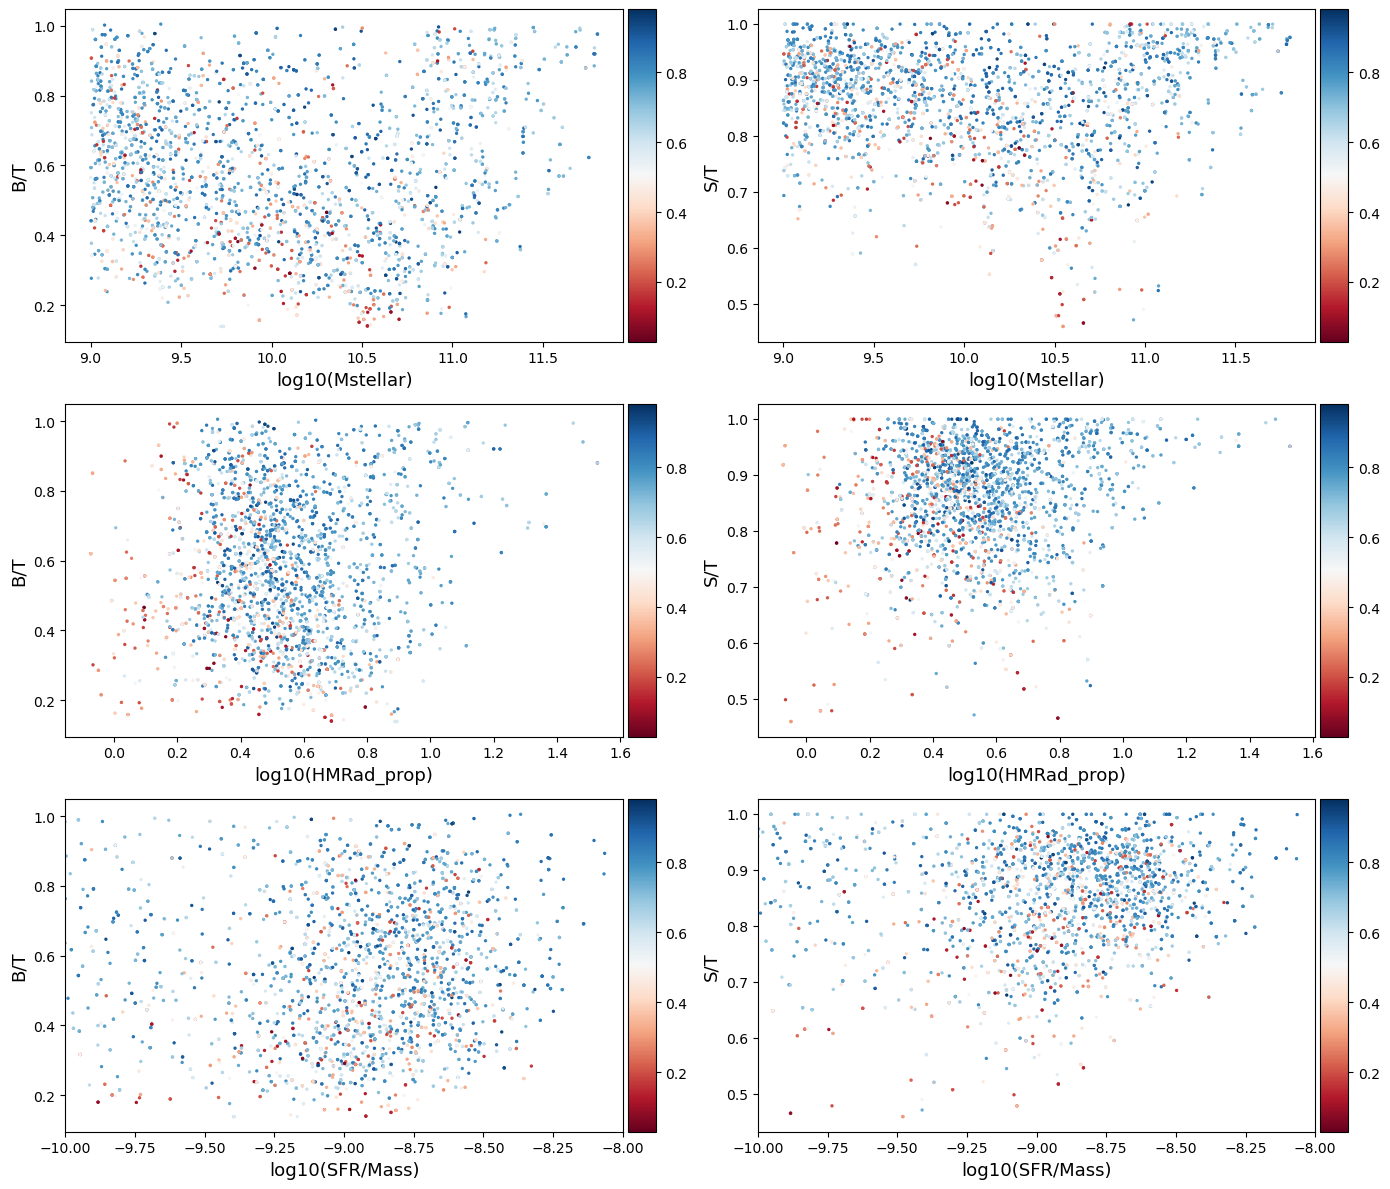

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
y_params = ['B/T','S/T']
x_params = ['Mstellar', 'HMRad_prop', 'SFR/Mass']

fig = plt.figure(figsize = (14,12))
ax = fig.subplots(len(x_params), 2)

results = results_list[1]

# controls = results.loc[(results['LABEL'] == 0) & (results['Redshift'] > 2)& (results['Redshift'] < 2.5)].reset_index(drop = True)
controls = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)

for i, y_param in enumerate(y_params):
    for j, x_param in enumerate(x_params):
        # control_x = controls.loc[controls[y_param] > 0][x_param] * scale[x_param]
        control_x = np.log10(controls.loc[controls[y_param] > 0][x_param] * scale[x_param])
        control_y = controls.loc[controls[y_param] > 0][y_param]
        # control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
        plot = ax[j,i].scatter(control_x, control_y, s = 2, c = controls.loc[controls[y_param]>0]['PRED_MED'].values, cmap = 'RdBu')
        ax[j,i].set_xlabel('log10(' + x_param + ')', size = 13)
        ax[j,i].set_ylabel(y_param, size = 13)
        if x_param == 'SFR/Mass':
            ax[j,i].set_xlim(-10,-8)
        
        divider = make_axes_locatable(ax[j,i])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(plot, cax=cax, orientation='vertical')
plt.tight_layout()

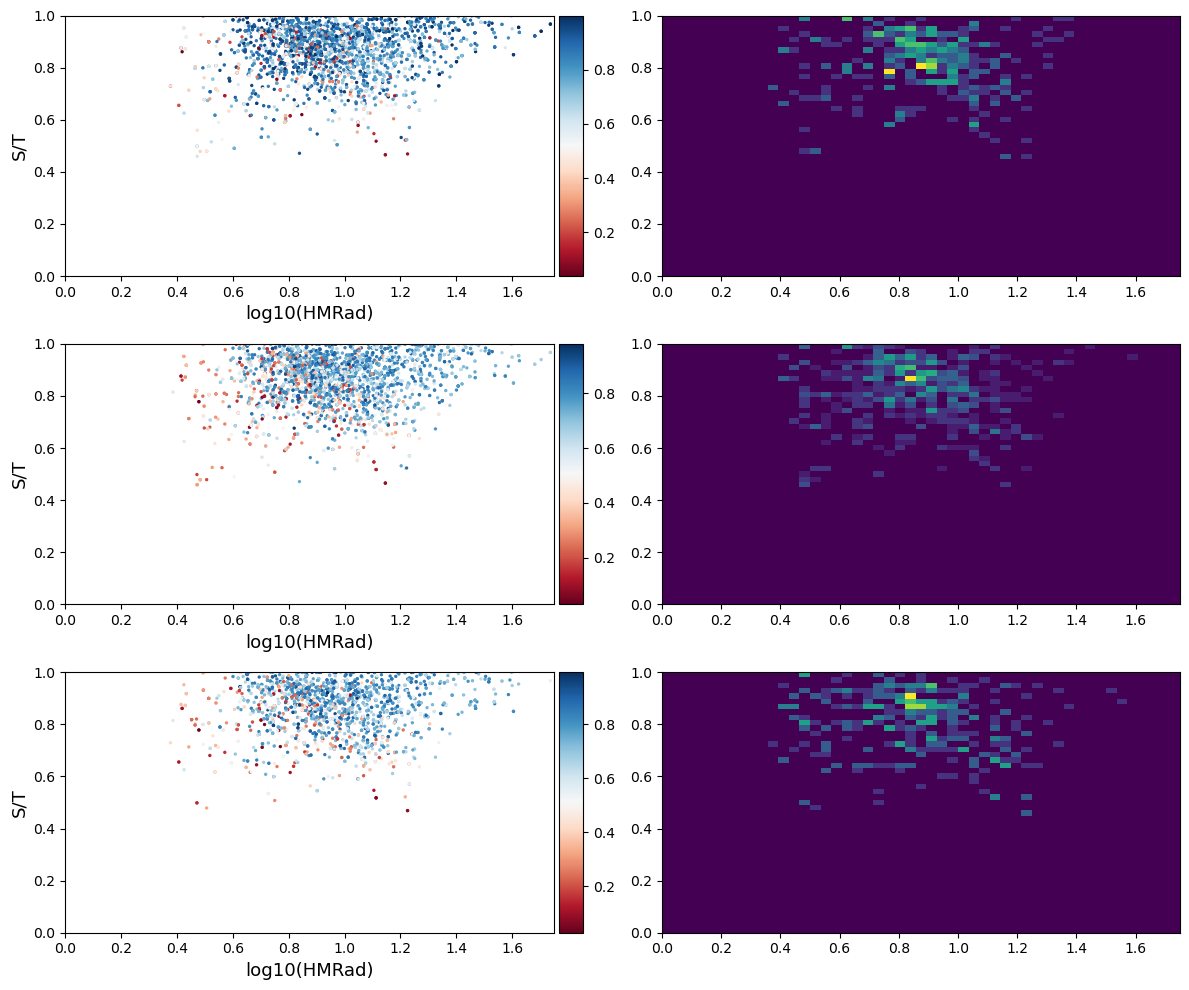

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
y_param = 'S/T'
x_param = 'HMRad'

fig = plt.figure(figsize = (12,10))
ax = fig.subplots(3,2)

for i, results in enumerate(results_list):

    # controls = results.loc[(results['LABEL'] == 0) & (results['Redshift'] > 2)& (results['Redshift'] < 2.5)].reset_index(drop = True)
    FP = results.loc[(results['LABEL'] == 1) & (results['PRED_MED'] < 0.5)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 1)].reset_index(drop = True)


    # control_x = controls.loc[controls[y_param] > 0][x_param] * scale[x_param]
    control_x = np.log10(controls.loc[controls[y_param] > 0][x_param] * scale[x_param])
    control_y = controls.loc[controls[y_param] > 0][y_param]
    # control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
    plot = ax[i,0].scatter(control_x, control_y, s = 2, c = controls.loc[controls[y_param]>0]['PRED_MED'].values, cmap = 'RdBu')
    ax[i,1].hist2d(np.log10(FP[x_param] * scale[x_param]), FP[y_param], bins = [np.linspace(0,1.75,50), np.linspace(0,1,50)])
    
    
    ax[i,0].set_xlabel('log10(' + x_param + ')', size = 13)
    ax[i,0].set_ylabel(y_param, size = 13)
    if x_param == 'SFR/Mass':
        ax[i,0].set_xlim(-10,-8)

    divider = make_axes_locatable(ax[i,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')
for axs in ax[:,0]:
    axs.set_ylim(0,1)
    axs.set_xlim(0,1.75)
plt.tight_layout()

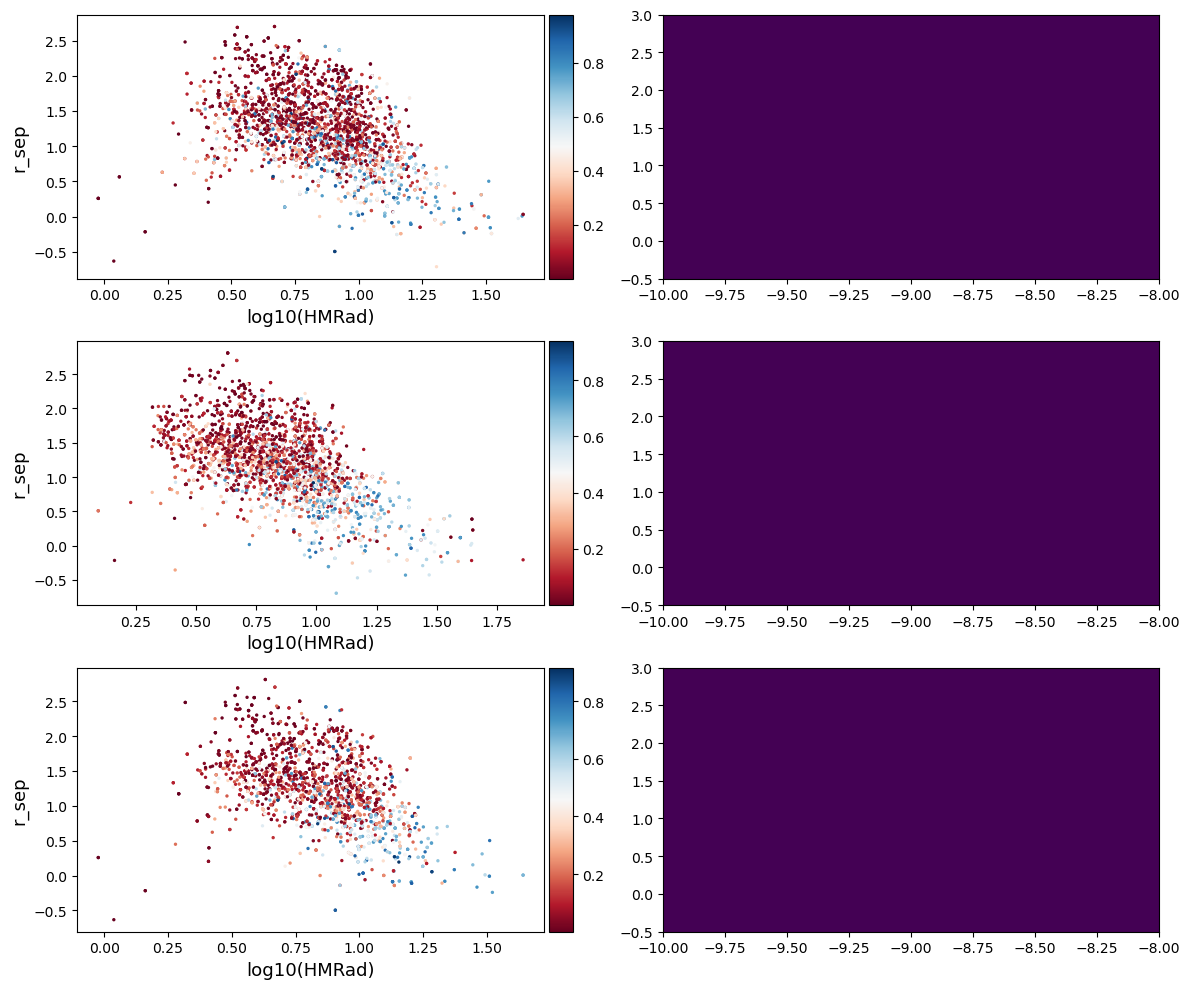

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
y_param = 'r_sep'
x_param = 'HMRad'

fig = plt.figure(figsize = (12,10))
ax = fig.subplots(3,2)

for i, results in enumerate(results_list):

    # controls = results.loc[(results['LABEL'] == 0) & (results['Redshift'] > 2)& (results['Redshift'] < 2.5)].reset_index(drop = True)
    FP = results.loc[(results['LABEL'] == 0) & (results['PRED_MED'] > 0.5)].reset_index(drop = True)
    controls = results.loc[(results['LABEL'] == 0)].reset_index(drop = True)


    # control_x = controls.loc[controls[y_param] > 0][x_param] * scale[x_param]
    control_x = np.log10(controls.loc[controls[y_param] > 0][x_param] * scale[x_param])
    control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
    # control_y = np.log10(controls.loc[controls[y_param] > 0][y_param])
    plot = ax[i,0].scatter(control_x, control_y, s = 2, c = controls.loc[controls[y_param]>0]['PRED_MED'].values, cmap = 'RdBu')
    ax[i,1].hist2d(np.log10(FP[x_param] * scale[x_param]), np.log10(FP[y_param]), bins = [np.linspace(-10,-8,50), np.linspace(-0.5,3,50)])
    
    
    ax[i,0].set_xlabel('log10(' + x_param + ')', size = 13)
    ax[i,0].set_ylabel(y_param, size = 13)
    if x_param == 'SFR/Mass':
        ax[i,0].set_xlim(-10,-8)

    divider = make_axes_locatable(ax[i,0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(plot, cax=cax, orientation='vertical')

plt.tight_layout()

In [ ]:
print(len(controls.loc[controls[param]>0]['STD_DEV']))
print(len(controls.loc[controls[param]>0][param]))

In [16]:
results['S/T'] = 1 - results['CircAbove07MinusBelowNeg07Frac']
results['B/T'] = results['CircTwiceBelow0Frac']

(array([219., 611., 467., 497., 403., 230., 237., 144., 100.,  51.]),
 array([0.07027699, 0.16398293, 0.25768887, 0.35139481, 0.44510075,
        0.53880668, 0.63251262, 0.72621856, 0.8199245 , 0.91363044,
        1.00733638]),
 [<matplotlib.patches.Polygon at 0x7f3559946190>])

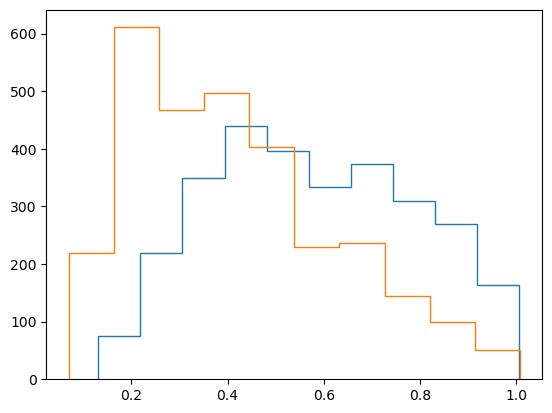

In [19]:
plt.hist(results.loc[results.LABEL == 1]['B/T'], histtype = 'step')
plt.hist(results.loc[results.LABEL == 0]['B/T'], histtype = 'step')

In [23]:
results_list

[          SFID  SnapNum   Mstellar       MBH          MDM        Mgas  \
 0      60509.0     48.0  15.777649  0.073770  1181.365845  151.924438   
 1     171752.0     33.0   0.903566  0.002203    33.873985    4.499676   
 2      56994.0     30.0   0.165674  0.000220     1.205289    0.174738   
 3     409132.0     46.0   0.359539  0.000186    14.328987    2.137404   
 4     401922.0     47.0   0.195052  0.000120    14.615647    2.123135   
 ...        ...      ...        ...       ...          ...         ...   
 5884    9975.0     37.0   0.626156  0.001679     9.834937    1.238402   
 5885   10497.0     43.0   1.859547  0.004191    12.450778    4.147566   
 5886  168501.0     36.0   0.265239  0.000298    11.722245    1.303799   
 5887   49758.0     31.0   1.747522  0.004758   113.752701   17.675135   
 5888  411432.0     42.0   0.150038  0.000130     9.276278    1.597670   
 
             SFR         Z      HMRad     BHacc  ...      r_sep   GAS_FRAC  \
 0     15.285128  0.013197  11.5

In [33]:
type(1) == list

False

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to b

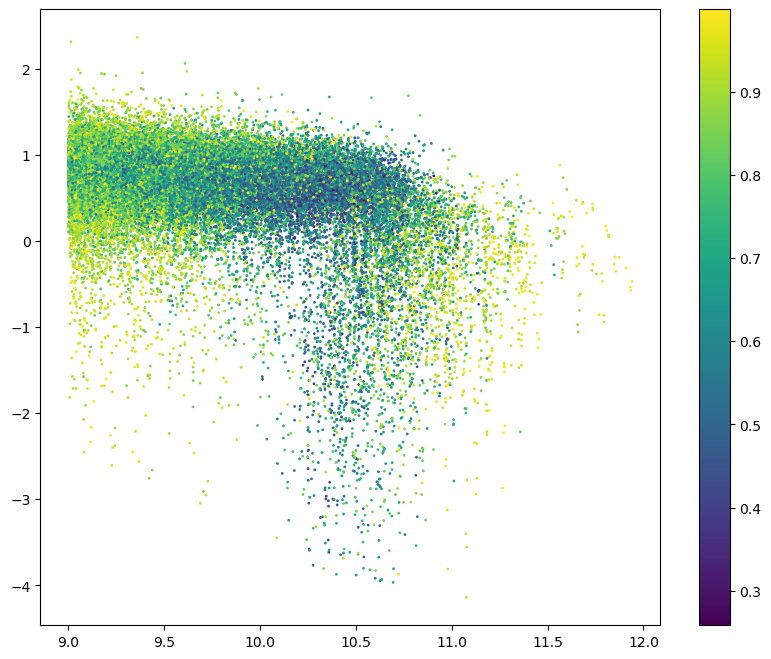

In [13]:
plt.figure(figsize = (10, 8))
controls = objects_df.loc[(objects_df['Redshift'] > 1) & (objects_df['Redshift'] < 1.2)]
controls['SFR/Mass'] = controls['SFR']/controls['Mstellar']
controls['S/T'] = 1 - controls['CircAbove07MinusBelowNeg07Frac']
controls['B/T'] = controls['CircTwiceBelow0Frac']
plt.scatter(np.log10(controls['Mstellar'] * 1e10), np.log10(controls['SFR/Mass']), s = 1, c = controls['S/T'])
plt.colorbar()

14835
12517
9797
6832


/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

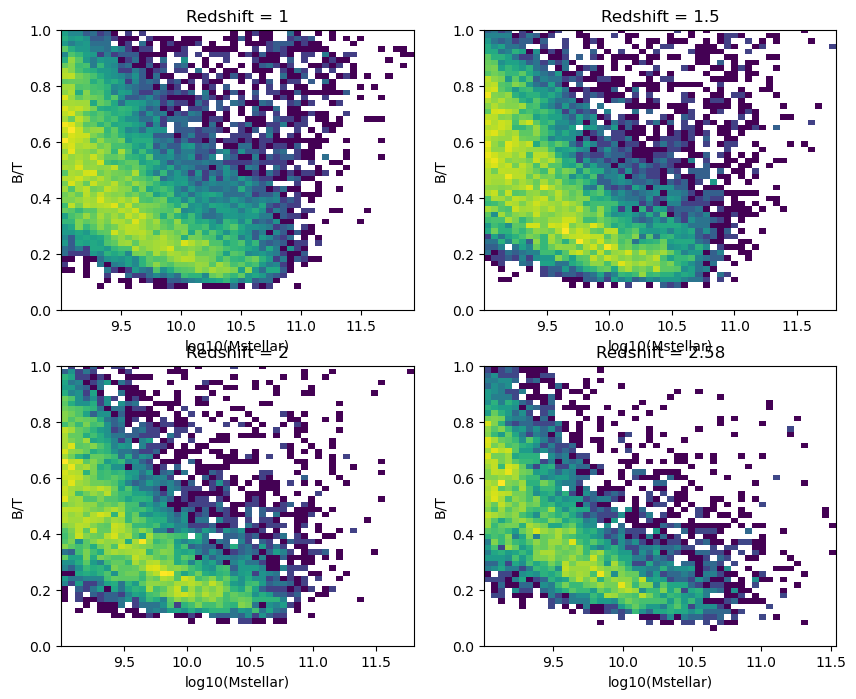

In [30]:
fig = plt.figure(figsize = (10, 8))
ax = fig.subplots(2,2)
zs = [1, 1.5, 2, 2.58]

for i, z in enumerate(zs):
    controls = objects_df.loc[(objects_df['Redshift']== z)]
    print(len(controls))
    controls['SFR/Mass'] = controls['SFR']/controls['Mstellar']
    controls['S/T'] = 1 - controls['CircAbove07MinusBelowNeg07Frac']
    controls['B/T'] = controls['CircTwiceBelow0Frac']
    ax[int(i/2),int(i%2)].hist2d(np.log10(controls['Mstellar'] * 1e10), controls['B/T'], bins = 50,norm = LogNorm())
    ax[int(i/2),int(i%2)].set_ylim(0,1)
    ax[int(i/2),int(i%2)].set_title('Redshift = ' + str(z))
    ax[int(i/2),int(i%2)].set_xlabel('log10(Mstellar)')
    ax[int(i/2),int(i%2)].set_ylabel('B/T')

In [26]:
np.max(objects_df.Redshift)

2.58

In [8]:
controls = results_list[0].loc[results_list[0].LABEL == 0]

In [9]:
controls['log10(MStellar)'] = np.log10(controls['Mstellar'])

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
controls['Mass bin'], bins_ = pd.cut(controls['log10(MStellar)'], 100, retbins = True, right = True, labels = np.arange(0,100))

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
objects_df
objects_df['S/T'] = 1 - objects_df['CircAbove07MinusBelowNeg07Frac']
objects_df['B/T'] = objects_df['CircTwiceBelow0Frac']

/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/astroconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: 

100
100
100
100


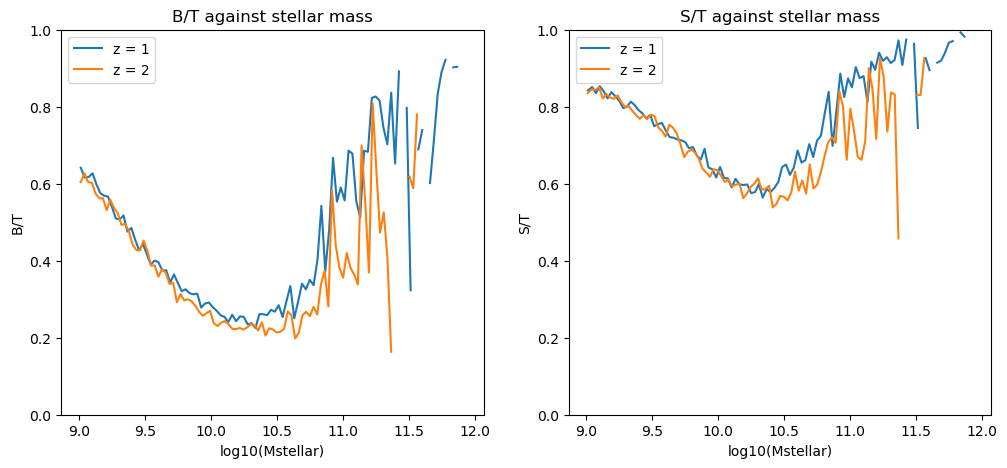

In [59]:
fig = plt.figure(figsize = (12,5))
ax = fig.subplots(1,2)

for redshift in [1,2]:

    controls = objects_df.loc[(objects_df.Redshift == redshift)]
    controls['log10(MStellar)'] = np.log10(controls['Mstellar']) + 10
    controls['Mass bin'], bins_ = pd.cut(controls['log10(MStellar)'], 100, retbins = True, right = True, labels = np.arange(0,100))

    medians = []
    midpoints = []
    for bin_ in range(100):
        filt = controls.loc[controls['Mass bin'] == bin_]
            
        medians.append([np.median(filt['B/T']), np.median(filt['S/T'])])
        midpoints.append((bins_[bin_] + bins_[bin_+1])/2)
    medians = np.array(medians)
    print(len(medians[:,0]))
    print(len(midpoints))
    ax[0].plot(midpoints, medians[:,0], label = 'z = ' + str(redshift))
    ax[1].plot(midpoints, medians[:,1], label = 'z = ' + str(redshift))
    
    ax[0].set_ylabel('B/T')
    ax[0].set_title('B/T against stellar mass')
    ax[1].set_title('S/T against stellar mass')
    ax[1].set_ylabel('S/T')
    

for axs in ax:
    axs.legend()
    axs.set_ylim(0,1)
    axs.set_xlabel('log10(Mstellar)')

In [46]:
medians

[0.7871922999620438,
 0.8649431318044662,
 0.7825965285301208,
 0.826235443353653,
 0.7988830655813217,
 0.7721764147281647,
 0.7804281786084175,
 0.810528352856636,
 0.7841502204537392,
 0.7697503119707108,
 0.8148842975497246,
 0.8509190380573273,
 0.7624041438102722,
 0.8185975477099419,
 0.8326603025197983,
 0.7840708941221237,
 0.7399939894676208,
 0.8419360443949699,
 0.6975460052490234,
 0.7253328263759613,
 0.762131467461586,
 0.7712207436561584,
 0.7649180740118027,
 0.6618694067001343,
 0.7943351715803146,
 0.689539223909378,
 0.6855818778276443,
 0.6595496237277985,
 0.6712691634893417,
 0.7026650309562683,
 0.6678256988525391,
 0.6317421495914459,
 0.551293671131134,
 0.606242835521698,
 0.6338818967342377,
 0.6700449287891388,
 0.5925556421279907,
 0.6344877183437347,
 0.6362126469612122,
 0.5204377770423889,
 0.6139295697212219,
 0.6138617843389511,
 0.709651917219162,
 0.487695574760437,
 0.5044980049133301,
 0.5087489783763885,
 0.6033686548471451,
 0.5755155980587006,


In [23]:
pd.cut(controls['log10(MStellar)'], 100)[0]

Interval(11.177, 11.204, closed='right')

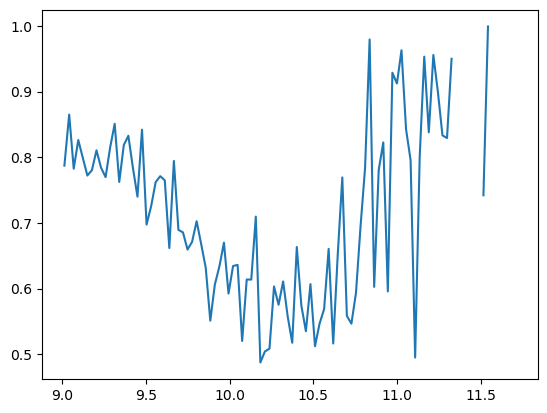

In [47]:
plt.plot(midpoints, medians)

In [ ]:
filtered = cnn_run_table.loc[(cnn_run_table.boost_massive_gals == 'True') & (cnn_run_table.ratio_merger == 0.1) & 
                         (cnn_run_table.dt_merger == 0.2) & (cnn_run_table.ratio_nonmerger == 0.1) & (cnn_run_table.dt_nonmerger == 1)
                                     & (cnn_run_table.grab_list_name == 'grablist_run_%05d.parquet' %(grab_list_id))& (cnn_run_table.PIX_SCALE == 50)]

In [4]:
for results in results_list:
    results['HMRad_prop'] = np.NaN
    for idx, row in results.iterrows():
        snap = row.SnapNum
        row['HMRad_prop'] = row['HMRad']/0.7 * scale_factor['a'][int(snap)]

In [7]:
for results in results_list:
    for idx, row in results.iterrows():
        row['HMRad_prop'] = row['HMRad']/0.7 * scale_factor[int(row['SnapNum'])]

KeyError: 48

In [15]:
results_list

[          SFID  SnapNum   Mstellar       MBH          MDM        Mgas  \
 0      60509.0     48.0  15.777649  0.073770  1181.365845  151.924438   
 1     171752.0     33.0   0.903566  0.002203    33.873985    4.499676   
 2      56994.0     30.0   0.165674  0.000220     1.205289    0.174738   
 3     409132.0     46.0   0.359539  0.000186    14.328987    2.137404   
 4     401922.0     47.0   0.195052  0.000120    14.615647    2.123135   
 ...        ...      ...        ...       ...          ...         ...   
 5884    9975.0     37.0   0.626156  0.001679     9.834937    1.238402   
 5885   10497.0     43.0   1.859547  0.004191    12.450778    4.147566   
 5886  168501.0     36.0   0.265239  0.000298    11.722245    1.303799   
 5887   49758.0     31.0   1.747522  0.004758   113.752701   17.675135   
 5888  411432.0     42.0   0.150038  0.000130     9.276278    1.597670   
 
             SFR         Z      HMRad     BHacc  ...   GAS_FRAC  PRED_MED  \
 0     15.285128  0.013197  11.55

In [4]:
objects_df.columns

Index(['SFID', 'SnapNum', 'Mstellar', 'MBH', 'MDM', 'Mgas', 'SFR', 'Z',
       'HMRad', 'BHacc', 'ratio_recent', 'dt_recent', 'SFID_recent',
       'snap_recent', 'ratio_biggest', 'dt_biggest', 'SFID_biggest',
       'snap_biggest', 'Redshift', 'r1', 'r1_id', 'r2', 'r2_id',
       'CircAbove07Frac', 'CircAbove07Frac_allstars',
       'CircAbove07MinusBelowNeg07Frac',
       'CircAbove07MinusBelowNeg07Frac_allstars', 'CircTwiceBelow0Frac',
       'CircTwiceBelow0Frac_allstars', 'r1_Mstellar', 'r1_HMRad', 'r_sep'],
      dtype='object')

In [7]:
np.min(objects_df[objects_df.ratio_recent > 0].ratio_recent)

0.010002193972468376